In [1]:
from preprocessing import *
import torch.optim as optim
from tqdm import tqdm
from mindiffusion.ddpm import DDPM
from mindiffusion.unet import NaiveUnet
device = torch.device('cuda:2')
train_data = train_data.to(device)

In [2]:
ddpm = DDPM(eps_model=NaiveUnet(1, 1, n_feat=128), betas=(1e-4, 0.02), n_T=50)
ddpm.to(device)

DDPM(
  (eps_model): NaiveUnet(
    (init_conv): Conv3(
      (main): Sequential(
        (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): GroupNorm(8, 128, eps=1e-05, affine=True)
        (2): ReLU()
      )
      (conv): Sequential(
        (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): GroupNorm(8, 128, eps=1e-05, affine=True)
        (2): ReLU()
        (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): GroupNorm(8, 128, eps=1e-05, affine=True)
        (5): ReLU()
      )
    )
    (down1): UnetDown(
      (model): Sequential(
        (0): Conv3(
          (main): Sequential(
            (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): GroupNorm(8, 128, eps=1e-05, affine=True)
            (2): ReLU()
          )
          (conv): Sequential(
            (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
         

In [3]:
train_data = train_data.reshape(400, 1, 1, 64, 64)

In [4]:
ddpm.load_state_dict(torch.load("ddpm_batched.pth"))

<All keys matched successfully>

In [5]:
def train_1_ep_ddpm(num_epoch, optim):

    print(f"Epoch {num_epoch} : ")
    ddpm.train()

    loss_ema = None
    

    train_data_tmp = train_data[torch.randperm(train_data.size()[0])]
    train_data_tmp = train_data_tmp.reshape(100, 4, 1, 64, 64)
    
    for i in tqdm(range(train_data_tmp.shape[0])):
        optim.zero_grad()
        loss = ddpm(train_data_tmp[i])
        loss.backward()
        if loss_ema is None:
            loss_ema = loss.item()
        else:
            loss_ema = 0.9 * loss_ema + 0.1 * loss.item()
        optim.step()
    print('loss',loss_ema)
    if num_epoch%20 == 1:
        ddpm.eval()
        with torch.no_grad():
            xh = ddpm.sample(3, (1, 64, 64), device)
            print(xh.shape)
            tensor_to_picture(xh[0].detach().cpu().numpy()[0])
            tensor_to_picture(xh[1].detach().cpu().numpy()[0])
            tensor_to_picture(xh[2].detach().cpu().numpy()[0])

    # save model
    torch.save(ddpm.state_dict(), f"./ddpm_batched.pth")

In [6]:
def train_ddpm(epoch, lr, lr_decay, reg):
    for i in range(epoch):
        
        optim = torch.optim.SGD(ddpm.parameters(), lr=lr*lr_decay**i, momentum=0.9, weight_decay=reg)
        train_1_ep_ddpm(i, optim)

Epoch 0 : 


100%|██████████| 100/100 [00:07<00:00, 13.19it/s]


loss 0.32054619858803196
Epoch 1 : 


100%|██████████| 100/100 [00:07<00:00, 12.54it/s]


loss 0.2120436462273591
torch.Size([3, 1, 64, 64])


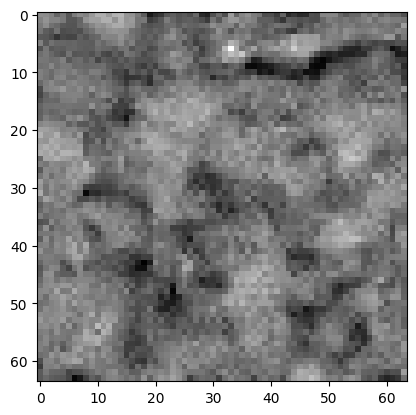

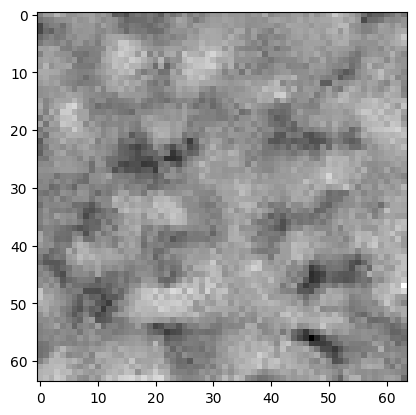

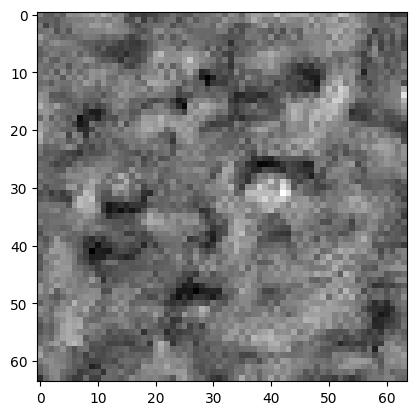

Epoch 2 : 


100%|██████████| 100/100 [00:07<00:00, 12.58it/s]


loss 0.27211745661943676
Epoch 3 : 


100%|██████████| 100/100 [00:07<00:00, 12.57it/s]


loss 0.28124812584473813
Epoch 4 : 


100%|██████████| 100/100 [00:07<00:00, 12.71it/s]


loss 0.2659226609433894
Epoch 5 : 


100%|██████████| 100/100 [00:07<00:00, 12.88it/s]


loss 0.23804226239012122
Epoch 6 : 


100%|██████████| 100/100 [00:07<00:00, 13.01it/s]


loss 0.282809611370368
Epoch 7 : 


100%|██████████| 100/100 [00:07<00:00, 12.76it/s]


loss 0.25436087665859886
Epoch 8 : 


100%|██████████| 100/100 [00:07<00:00, 12.62it/s]


loss 0.31557264765754023
Epoch 9 : 


100%|██████████| 100/100 [00:07<00:00, 12.86it/s]


loss 0.28216598100528767
Epoch 10 : 


100%|██████████| 100/100 [00:07<00:00, 12.97it/s]


loss 0.24958723157554707
Epoch 11 : 


100%|██████████| 100/100 [00:07<00:00, 13.13it/s]


loss 0.26523095781772793
Epoch 12 : 


100%|██████████| 100/100 [00:07<00:00, 12.89it/s]


loss 0.29386870671275434
Epoch 13 : 


100%|██████████| 100/100 [00:07<00:00, 12.75it/s]


loss 0.239006044734279
Epoch 14 : 


100%|██████████| 100/100 [00:07<00:00, 12.69it/s]


loss 0.2859458968235828
Epoch 15 : 


100%|██████████| 100/100 [00:07<00:00, 12.86it/s]


loss 0.2600451250554946
Epoch 16 : 


100%|██████████| 100/100 [00:07<00:00, 12.98it/s]


loss 0.2774707887932629
Epoch 17 : 


100%|██████████| 100/100 [00:07<00:00, 12.74it/s]


loss 0.27752208282420227
Epoch 18 : 


100%|██████████| 100/100 [00:07<00:00, 12.96it/s]


loss 0.27278470878182537
Epoch 19 : 


100%|██████████| 100/100 [00:07<00:00, 13.20it/s]


loss 0.2550133766171434
Epoch 20 : 


100%|██████████| 100/100 [00:07<00:00, 12.90it/s]


loss 0.2622549070288662
Epoch 21 : 


100%|██████████| 100/100 [00:07<00:00, 12.98it/s]


loss 0.25160875565054913
torch.Size([3, 1, 64, 64])


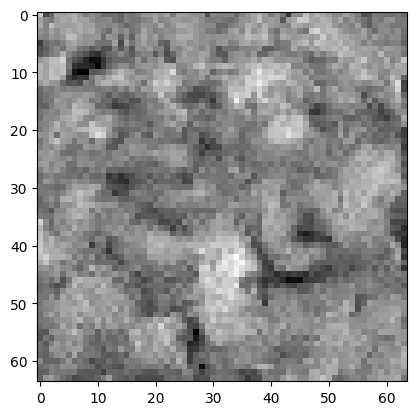

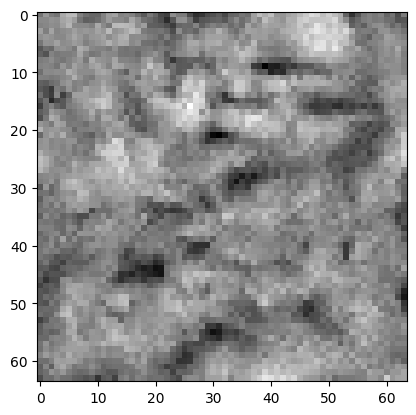

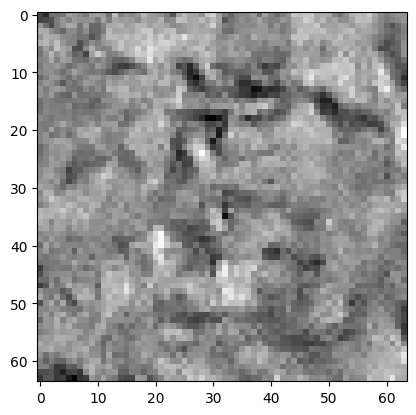

Epoch 22 : 


100%|██████████| 100/100 [00:07<00:00, 13.23it/s]


loss 0.22474061049478167
Epoch 23 : 


100%|██████████| 100/100 [00:07<00:00, 12.70it/s]


loss 0.2657264948284087
Epoch 24 : 


100%|██████████| 100/100 [00:07<00:00, 12.52it/s]


loss 0.2275502382624703
Epoch 25 : 


100%|██████████| 100/100 [00:07<00:00, 12.85it/s]


loss 0.2559529046310007
Epoch 26 : 


100%|██████████| 100/100 [00:07<00:00, 12.89it/s]


loss 0.250490310517227
Epoch 27 : 


100%|██████████| 100/100 [00:07<00:00, 12.95it/s]


loss 0.2558585124013841
Epoch 28 : 


100%|██████████| 100/100 [00:07<00:00, 13.10it/s]


loss 0.26312581149261327
Epoch 29 : 


100%|██████████| 100/100 [00:07<00:00, 12.65it/s]


loss 0.250889283176767
Epoch 30 : 


100%|██████████| 100/100 [00:07<00:00, 12.82it/s]


loss 0.21983317800740837
Epoch 31 : 


100%|██████████| 100/100 [00:07<00:00, 12.86it/s]


loss 0.24266178082449466
Epoch 32 : 


100%|██████████| 100/100 [00:07<00:00, 13.12it/s]


loss 0.26382998279297065
Epoch 33 : 


100%|██████████| 100/100 [00:07<00:00, 12.84it/s]


loss 0.2789998370792571
Epoch 34 : 


100%|██████████| 100/100 [00:07<00:00, 12.73it/s]


loss 0.251877837845416
Epoch 35 : 


100%|██████████| 100/100 [00:05<00:00, 16.75it/s]


loss 0.267527071531139
Epoch 36 : 


100%|██████████| 100/100 [00:05<00:00, 19.90it/s]


loss 0.22894877420110604
Epoch 37 : 


100%|██████████| 100/100 [00:05<00:00, 19.25it/s]


loss 0.2216556866786777
Epoch 38 : 


100%|██████████| 100/100 [00:05<00:00, 16.87it/s]


loss 0.26377571490755125
Epoch 39 : 


100%|██████████| 100/100 [00:06<00:00, 14.63it/s]


loss 0.2597765534145084
Epoch 40 : 


100%|██████████| 100/100 [00:07<00:00, 13.32it/s]


loss 0.26828125075806364
Epoch 41 : 


100%|██████████| 100/100 [00:07<00:00, 13.52it/s]


loss 0.24641401303281324
torch.Size([3, 1, 64, 64])


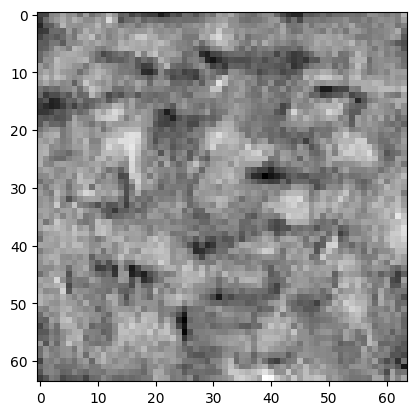

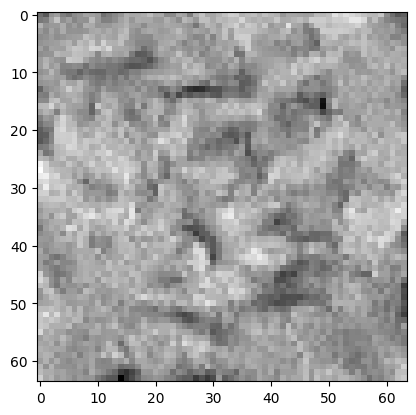

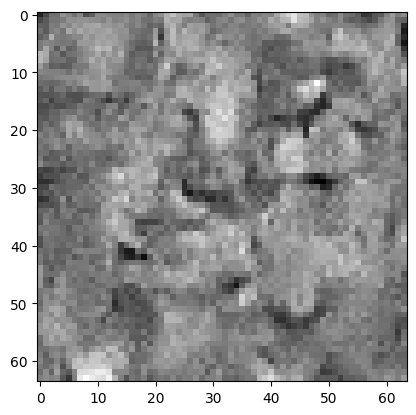

Epoch 42 : 


100%|██████████| 100/100 [00:07<00:00, 13.54it/s]


loss 0.25829801982761746
Epoch 43 : 


100%|██████████| 100/100 [00:07<00:00, 13.60it/s]


loss 0.23428873352832885
Epoch 44 : 


100%|██████████| 100/100 [00:07<00:00, 13.74it/s]


loss 0.28989441848476033
Epoch 45 : 


100%|██████████| 100/100 [00:07<00:00, 13.34it/s]


loss 0.27772125268000447
Epoch 46 : 


100%|██████████| 100/100 [00:07<00:00, 13.87it/s]


loss 0.27054690587111874
Epoch 47 : 


100%|██████████| 100/100 [00:07<00:00, 13.53it/s]


loss 0.22040161037630376
Epoch 48 : 


100%|██████████| 100/100 [00:07<00:00, 13.40it/s]


loss 0.25630585090478697
Epoch 49 : 


100%|██████████| 100/100 [00:07<00:00, 13.81it/s]


loss 0.251329007192983
Epoch 50 : 


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]


loss 0.2274409825111806
Epoch 51 : 


100%|██████████| 100/100 [00:07<00:00, 13.41it/s]


loss 0.2636788589066416
Epoch 52 : 


100%|██████████| 100/100 [00:07<00:00, 13.83it/s]


loss 0.24135652388472245
Epoch 53 : 


100%|██████████| 100/100 [00:07<00:00, 13.34it/s]


loss 0.28124814419063043
Epoch 54 : 


100%|██████████| 100/100 [00:07<00:00, 13.65it/s]


loss 0.2197734219299175
Epoch 55 : 


100%|██████████| 100/100 [00:07<00:00, 13.60it/s]


loss 0.2264642736658522
Epoch 56 : 


100%|██████████| 100/100 [00:07<00:00, 13.77it/s]


loss 0.2522238129735076
Epoch 57 : 


100%|██████████| 100/100 [00:07<00:00, 13.76it/s]


loss 0.22852392255337356
Epoch 58 : 


100%|██████████| 100/100 [00:07<00:00, 13.04it/s]


loss 0.22701603338816032
Epoch 59 : 


100%|██████████| 100/100 [00:07<00:00, 13.78it/s]


loss 0.23877981196777776
Epoch 60 : 


100%|██████████| 100/100 [00:07<00:00, 13.75it/s]


loss 0.22246104207769046
Epoch 61 : 


100%|██████████| 100/100 [00:07<00:00, 13.40it/s]


loss 0.23021457552189956
torch.Size([3, 1, 64, 64])


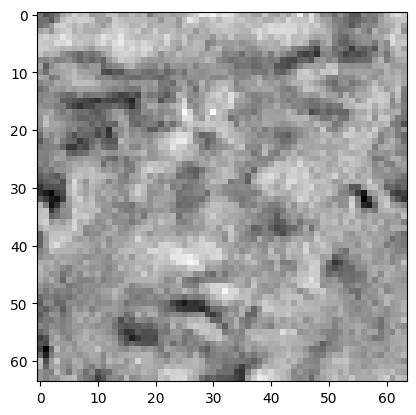

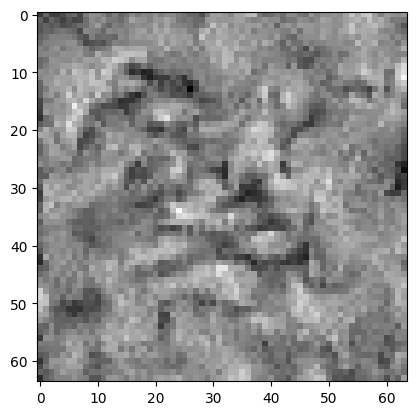

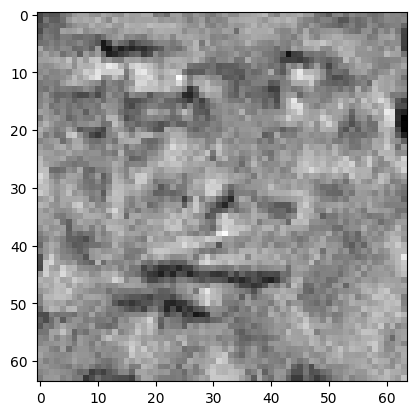

Epoch 62 : 


100%|██████████| 100/100 [00:07<00:00, 13.27it/s]


loss 0.25334582430608105
Epoch 63 : 


100%|██████████| 100/100 [00:07<00:00, 13.59it/s]


loss 0.24150603662710324
Epoch 64 : 


100%|██████████| 100/100 [00:07<00:00, 13.43it/s]


loss 0.22600333264229303
Epoch 65 : 


100%|██████████| 100/100 [00:07<00:00, 13.39it/s]


loss 0.23514881844860058
Epoch 66 : 


100%|██████████| 100/100 [00:07<00:00, 13.31it/s]


loss 0.2619623328131019
Epoch 67 : 


100%|██████████| 100/100 [00:07<00:00, 13.21it/s]


loss 0.24592794968377832
Epoch 68 : 


100%|██████████| 100/100 [00:07<00:00, 13.62it/s]


loss 0.27209904748150227
Epoch 69 : 


100%|██████████| 100/100 [00:07<00:00, 13.87it/s]


loss 0.258973026921803
Epoch 70 : 


100%|██████████| 100/100 [00:07<00:00, 13.48it/s]


loss 0.2603305186362024
Epoch 71 : 


100%|██████████| 100/100 [00:06<00:00, 14.66it/s]


loss 0.23281352498031838
Epoch 72 : 


100%|██████████| 100/100 [00:06<00:00, 16.50it/s]


loss 0.227432269071367
Epoch 73 : 


100%|██████████| 100/100 [00:06<00:00, 16.25it/s]


loss 0.2535173593511112
Epoch 74 : 


100%|██████████| 100/100 [00:06<00:00, 16.05it/s]


loss 0.22604770225806992
Epoch 75 : 


100%|██████████| 100/100 [00:06<00:00, 16.58it/s]


loss 0.2368870489464412
Epoch 76 : 


100%|██████████| 100/100 [00:06<00:00, 16.37it/s]


loss 0.2637865812242551
Epoch 77 : 


100%|██████████| 100/100 [00:06<00:00, 16.55it/s]


loss 0.20754802600249755
Epoch 78 : 


100%|██████████| 100/100 [00:06<00:00, 16.14it/s]


loss 0.23366184353194708
Epoch 79 : 


100%|██████████| 100/100 [00:06<00:00, 16.53it/s]


loss 0.24004595522452105
Epoch 80 : 


100%|██████████| 100/100 [00:06<00:00, 15.68it/s]


loss 0.2662076074067079
Epoch 81 : 


100%|██████████| 100/100 [00:07<00:00, 13.37it/s]


loss 0.20921532845241428
torch.Size([3, 1, 64, 64])


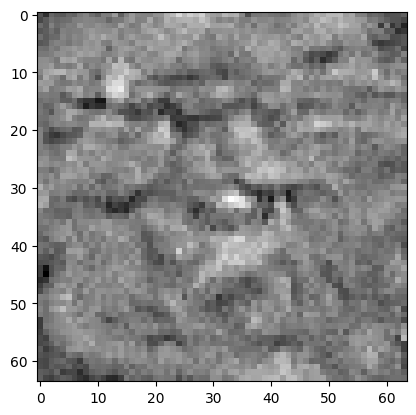

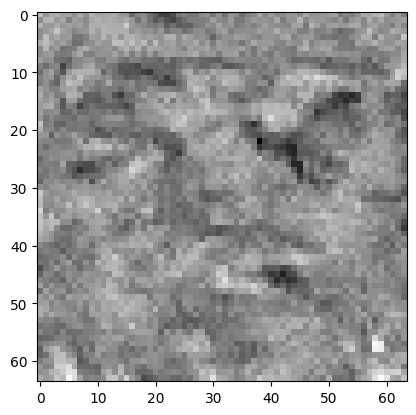

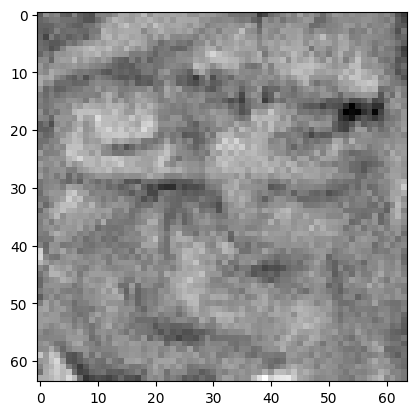

Epoch 82 : 


100%|██████████| 100/100 [00:07<00:00, 13.48it/s]


loss 0.26057784338729945
Epoch 83 : 


100%|██████████| 100/100 [00:07<00:00, 13.59it/s]


loss 0.2459298001115153
Epoch 84 : 


100%|██████████| 100/100 [00:07<00:00, 13.49it/s]


loss 0.24837896324138714
Epoch 85 : 


100%|██████████| 100/100 [00:07<00:00, 13.47it/s]


loss 0.19808265108689682
Epoch 86 : 


100%|██████████| 100/100 [00:07<00:00, 14.06it/s]


loss 0.23848226731937758
Epoch 87 : 


100%|██████████| 100/100 [00:07<00:00, 13.62it/s]


loss 0.2509485463811693
Epoch 88 : 


100%|██████████| 100/100 [00:07<00:00, 13.54it/s]


loss 0.2393783127742704
Epoch 89 : 


100%|██████████| 100/100 [00:07<00:00, 13.75it/s]


loss 0.19448601372733973
Epoch 90 : 


100%|██████████| 100/100 [00:07<00:00, 13.44it/s]


loss 0.2625719886617836
Epoch 91 : 


100%|██████████| 100/100 [00:07<00:00, 13.42it/s]


loss 0.26244052111115573
Epoch 92 : 


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]


loss 0.284013756958496
Epoch 93 : 


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]


loss 0.22029172354416354
Epoch 94 : 


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]


loss 0.23194358150482192
Epoch 95 : 


100%|██████████| 100/100 [00:07<00:00, 13.39it/s]


loss 0.2306798093864016
Epoch 96 : 


100%|██████████| 100/100 [00:07<00:00, 13.32it/s]


loss 0.26423532308819236
Epoch 97 : 


100%|██████████| 100/100 [00:07<00:00, 13.72it/s]


loss 0.22548341641705644
Epoch 98 : 


100%|██████████| 100/100 [00:07<00:00, 13.49it/s]


loss 0.2265133397202421
Epoch 99 : 


100%|██████████| 100/100 [00:07<00:00, 13.58it/s]


loss 0.25262042233004944


In [26]:
train_ddpm(100, 0.001, 1, 0.0000)

Epoch 0 : 


100%|██████████| 100/100 [00:07<00:00, 13.82it/s]


loss 0.24554178745491675
Epoch 1 : 


100%|██████████| 100/100 [00:07<00:00, 13.49it/s]


loss 0.2305321715352293
torch.Size([3, 1, 64, 64])


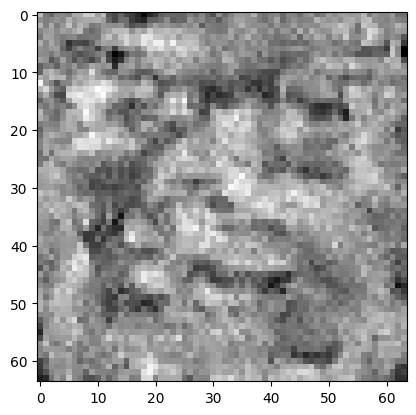

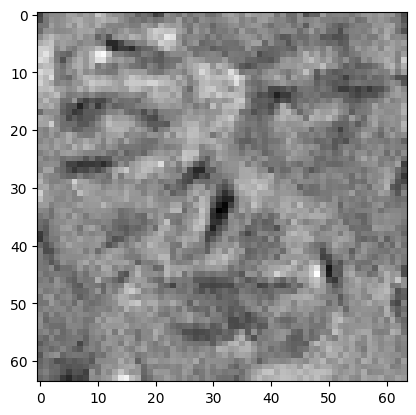

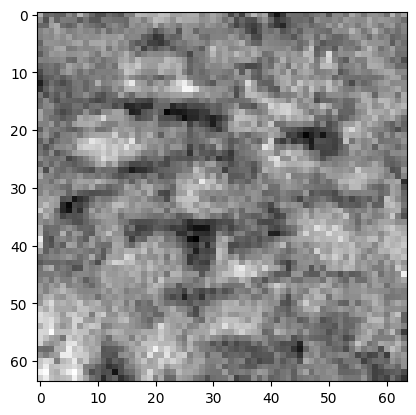

Epoch 2 : 


100%|██████████| 100/100 [00:07<00:00, 14.06it/s]


loss 0.2543529674875657
Epoch 3 : 


100%|██████████| 100/100 [00:07<00:00, 13.74it/s]


loss 0.22950174161581885
Epoch 4 : 


100%|██████████| 100/100 [00:07<00:00, 14.15it/s]


loss 0.2161312562232516
Epoch 5 : 


100%|██████████| 100/100 [00:07<00:00, 13.45it/s]


loss 0.22289669942903206
Epoch 6 : 


100%|██████████| 100/100 [00:07<00:00, 13.34it/s]


loss 0.20748389283368518
Epoch 7 : 


100%|██████████| 100/100 [00:07<00:00, 13.82it/s]


loss 0.22654614506785054
Epoch 8 : 


100%|██████████| 100/100 [00:07<00:00, 13.37it/s]


loss 0.23741073525036316
Epoch 9 : 


100%|██████████| 100/100 [00:07<00:00, 13.35it/s]


loss 0.2128405498787291
Epoch 10 : 


100%|██████████| 100/100 [00:07<00:00, 13.45it/s]


loss 0.26448610680833434
Epoch 11 : 


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]


loss 0.21490322175763615
Epoch 12 : 


100%|██████████| 100/100 [00:07<00:00, 13.42it/s]


loss 0.25065802094170997
Epoch 13 : 


100%|██████████| 100/100 [00:07<00:00, 13.83it/s]


loss 0.28064048427763677
Epoch 14 : 


100%|██████████| 100/100 [00:07<00:00, 13.51it/s]


loss 0.2500386426361678
Epoch 15 : 


100%|██████████| 100/100 [00:07<00:00, 13.58it/s]


loss 0.254691634998459
Epoch 16 : 


100%|██████████| 100/100 [00:07<00:00, 13.24it/s]


loss 0.21866094676643552
Epoch 17 : 


100%|██████████| 100/100 [00:07<00:00, 13.76it/s]


loss 0.2453760722595938
Epoch 18 : 


100%|██████████| 100/100 [00:07<00:00, 13.66it/s]


loss 0.24763118452059715
Epoch 19 : 


100%|██████████| 100/100 [00:07<00:00, 13.35it/s]


loss 0.2705604466058471
Epoch 20 : 


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]


loss 0.23075231413827912
Epoch 21 : 


100%|██████████| 100/100 [00:07<00:00, 13.50it/s]


loss 0.1924824147729339
torch.Size([3, 1, 64, 64])


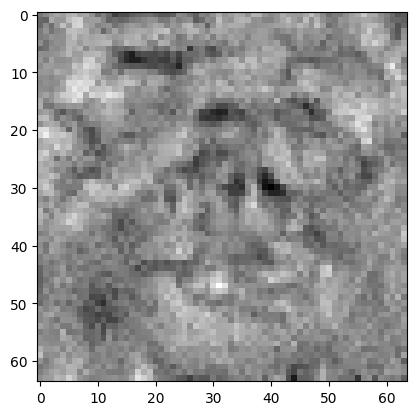

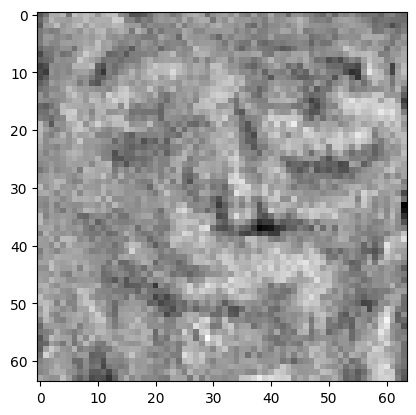

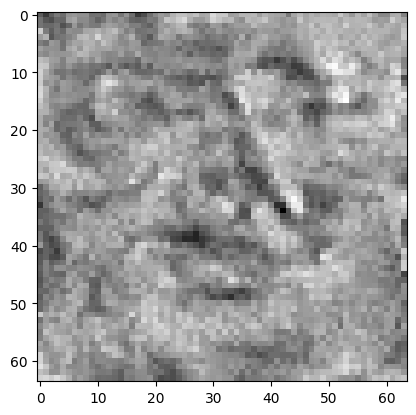

Epoch 22 : 


100%|██████████| 100/100 [00:07<00:00, 13.03it/s]


loss 0.21517426493869157
Epoch 23 : 


100%|██████████| 100/100 [00:07<00:00, 13.28it/s]


loss 0.24298537900962208
Epoch 24 : 


100%|██████████| 100/100 [00:07<00:00, 13.59it/s]


loss 0.24666416236906297
Epoch 25 : 


100%|██████████| 100/100 [00:07<00:00, 13.51it/s]


loss 0.2190177021160888
Epoch 26 : 


100%|██████████| 100/100 [00:07<00:00, 13.58it/s]


loss 0.2296382113407131
Epoch 27 : 


100%|██████████| 100/100 [00:07<00:00, 13.21it/s]


loss 0.24111550734875567
Epoch 28 : 


100%|██████████| 100/100 [00:07<00:00, 13.60it/s]


loss 0.20081023062655606
Epoch 29 : 


100%|██████████| 100/100 [00:07<00:00, 13.86it/s]


loss 0.25047200588882335
Epoch 30 : 


100%|██████████| 100/100 [00:07<00:00, 13.34it/s]


loss 0.23009535122996355
Epoch 31 : 


100%|██████████| 100/100 [00:07<00:00, 13.38it/s]


loss 0.21925129102340163
Epoch 32 : 


100%|██████████| 100/100 [00:07<00:00, 13.41it/s]


loss 0.21374098618135737
Epoch 33 : 


100%|██████████| 100/100 [00:07<00:00, 13.61it/s]


loss 0.24373394363499837
Epoch 34 : 


100%|██████████| 100/100 [00:07<00:00, 13.73it/s]


loss 0.21187189075631874
Epoch 35 : 


100%|██████████| 100/100 [00:07<00:00, 13.59it/s]


loss 0.2097628651510091
Epoch 36 : 


100%|██████████| 100/100 [00:07<00:00, 13.38it/s]


loss 0.19704627241703349
Epoch 37 : 


100%|██████████| 100/100 [00:07<00:00, 13.24it/s]


loss 0.26605543173073276
Epoch 38 : 


100%|██████████| 100/100 [00:07<00:00, 13.54it/s]


loss 0.25799721568424344
Epoch 39 : 


100%|██████████| 100/100 [00:07<00:00, 13.24it/s]


loss 0.231061798402704
Epoch 40 : 


100%|██████████| 100/100 [00:07<00:00, 13.36it/s]


loss 0.19687012143367036
Epoch 41 : 


100%|██████████| 100/100 [00:07<00:00, 13.48it/s]


loss 0.2540157455544699
torch.Size([3, 1, 64, 64])


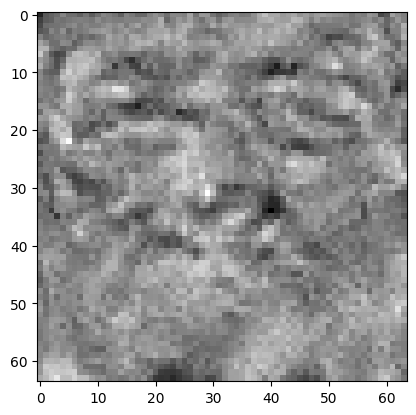

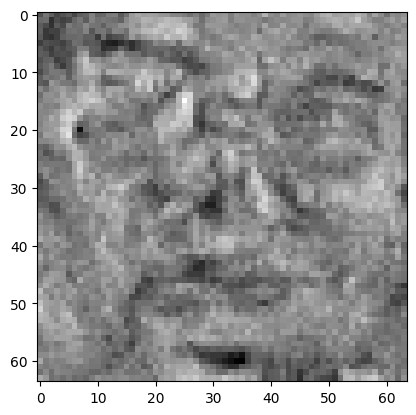

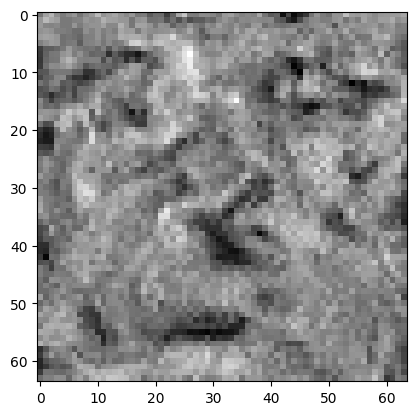

Epoch 42 : 


100%|██████████| 100/100 [00:07<00:00, 13.81it/s]


loss 0.23871822632317066
Epoch 43 : 


100%|██████████| 100/100 [00:07<00:00, 13.45it/s]


loss 0.22575016172250634
Epoch 44 : 


100%|██████████| 100/100 [00:07<00:00, 13.49it/s]


loss 0.22972386172202872
Epoch 45 : 


100%|██████████| 100/100 [00:07<00:00, 13.09it/s]


loss 0.2536486480432586
Epoch 46 : 


100%|██████████| 100/100 [00:07<00:00, 13.43it/s]


loss 0.22851203960783037
Epoch 47 : 


100%|██████████| 100/100 [00:07<00:00, 13.67it/s]


loss 0.25230159273750985
Epoch 48 : 


100%|██████████| 100/100 [00:07<00:00, 13.42it/s]


loss 0.24843966324655978
Epoch 49 : 


100%|██████████| 100/100 [00:07<00:00, 13.31it/s]


loss 0.23037696046651635
Epoch 50 : 


100%|██████████| 100/100 [00:07<00:00, 13.20it/s]


loss 0.2634570334190196
Epoch 51 : 


100%|██████████| 100/100 [00:07<00:00, 13.62it/s]


loss 0.23225439446879415
Epoch 52 : 


100%|██████████| 100/100 [00:07<00:00, 13.47it/s]


loss 0.21586054819502765
Epoch 53 : 


100%|██████████| 100/100 [00:07<00:00, 13.70it/s]


loss 0.23753041349633205
Epoch 54 : 


100%|██████████| 100/100 [00:07<00:00, 13.36it/s]


loss 0.20472183864132742
Epoch 55 : 


100%|██████████| 100/100 [00:07<00:00, 13.71it/s]


loss 0.22318633132495824
Epoch 56 : 


100%|██████████| 100/100 [00:07<00:00, 13.14it/s]


loss 0.2202732738483913
Epoch 57 : 


100%|██████████| 100/100 [00:07<00:00, 13.64it/s]


loss 0.2297597732743201
Epoch 58 : 


100%|██████████| 100/100 [00:07<00:00, 13.74it/s]


loss 0.2132835366255218
Epoch 59 : 


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]


loss 0.21945444757772745
Epoch 60 : 


100%|██████████| 100/100 [00:07<00:00, 13.83it/s]


loss 0.22586374920932945
Epoch 61 : 


100%|██████████| 100/100 [00:07<00:00, 13.67it/s]


loss 0.23597298891072238
torch.Size([3, 1, 64, 64])


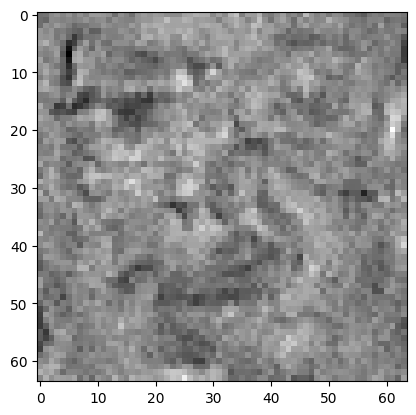

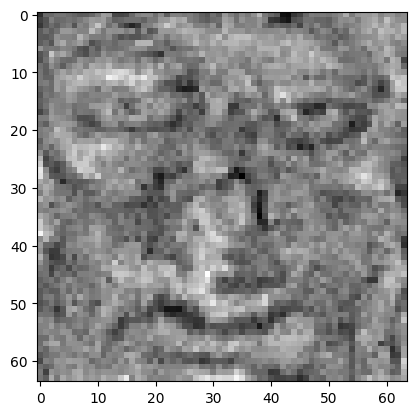

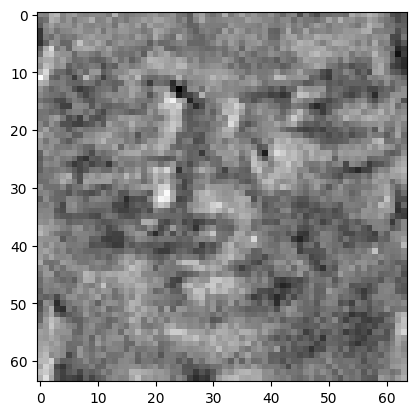

Epoch 62 : 


100%|██████████| 100/100 [00:07<00:00, 13.63it/s]


loss 0.2890623031409435
Epoch 63 : 


100%|██████████| 100/100 [00:07<00:00, 13.53it/s]


loss 0.2431927100864976
Epoch 64 : 


100%|██████████| 100/100 [00:07<00:00, 13.76it/s]


loss 0.23044191430891553
Epoch 65 : 


100%|██████████| 100/100 [00:07<00:00, 13.73it/s]


loss 0.21922132865694377
Epoch 66 : 


100%|██████████| 100/100 [00:07<00:00, 13.60it/s]


loss 0.23320124487479782
Epoch 67 : 


100%|██████████| 100/100 [00:07<00:00, 13.51it/s]


loss 0.27483238637107427
Epoch 68 : 


100%|██████████| 100/100 [00:07<00:00, 13.42it/s]


loss 0.19633349495389005
Epoch 69 : 


100%|██████████| 100/100 [00:07<00:00, 13.24it/s]


loss 0.24228977047609213
Epoch 70 : 


100%|██████████| 100/100 [00:07<00:00, 13.20it/s]


loss 0.23132580966244878
Epoch 71 : 


100%|██████████| 100/100 [00:07<00:00, 13.58it/s]


loss 0.21113143105349444
Epoch 72 : 


100%|██████████| 100/100 [00:07<00:00, 13.70it/s]


loss 0.21423633835567418
Epoch 73 : 


 18%|█▊        | 18/100 [00:01<00:06, 13.51it/s]

In [ ]:
train_ddpm(100, 0.0003, 1, 0.0000)

Epoch 0 : 


100%|██████████| 100/100 [00:07<00:00, 13.97it/s]


loss 0.1936248163979582
Epoch 1 : 


100%|██████████| 100/100 [00:07<00:00, 13.82it/s]


loss 0.21425693824966033
torch.Size([3, 1, 64, 64])


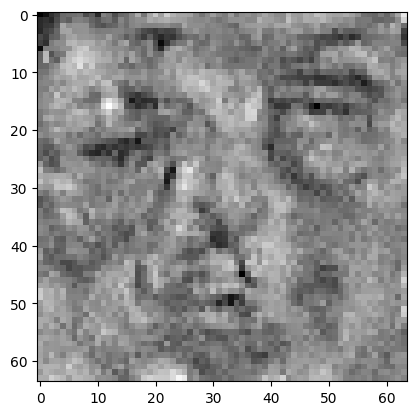

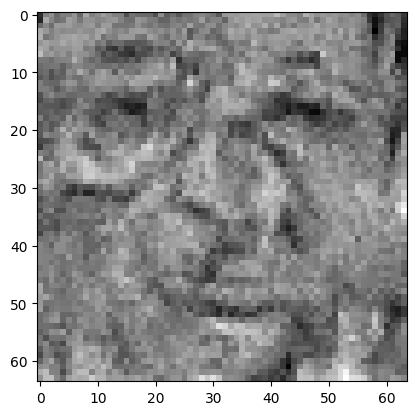

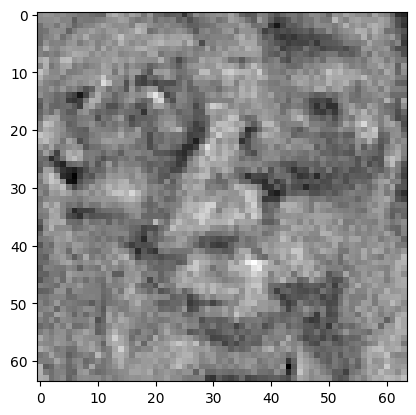

Epoch 2 : 


100%|██████████| 100/100 [00:07<00:00, 13.85it/s]


loss 0.24954431144571762
Epoch 3 : 


100%|██████████| 100/100 [00:07<00:00, 13.77it/s]


loss 0.23309034299071577
Epoch 4 : 


100%|██████████| 100/100 [00:07<00:00, 13.34it/s]


loss 0.23233553239116422
Epoch 5 : 


100%|██████████| 100/100 [00:07<00:00, 13.86it/s]


loss 0.201684078549011
Epoch 6 : 


100%|██████████| 100/100 [00:07<00:00, 13.68it/s]


loss 0.2357784826530133
Epoch 7 : 


100%|██████████| 100/100 [00:07<00:00, 13.70it/s]


loss 0.1977529145107922
Epoch 8 : 


100%|██████████| 100/100 [00:07<00:00, 13.32it/s]


loss 0.22910193408047513
Epoch 9 : 


100%|██████████| 100/100 [00:07<00:00, 13.61it/s]


loss 0.19952282075633018
Epoch 10 : 


100%|██████████| 100/100 [00:07<00:00, 13.30it/s]


loss 0.263973849592669
Epoch 11 : 


100%|██████████| 100/100 [00:07<00:00, 13.45it/s]


loss 0.23578453824652426
Epoch 12 : 


100%|██████████| 100/100 [00:07<00:00, 13.27it/s]


loss 0.23736625084401808
Epoch 13 : 


100%|██████████| 100/100 [00:07<00:00, 13.30it/s]


loss 0.20243729046981884
Epoch 14 : 


100%|██████████| 100/100 [00:07<00:00, 13.45it/s]


loss 0.26162742884601864
Epoch 15 : 


100%|██████████| 100/100 [00:07<00:00, 13.27it/s]


loss 0.25919475375100853
Epoch 16 : 


100%|██████████| 100/100 [00:07<00:00, 13.13it/s]


loss 0.25152052830803967
Epoch 17 : 


100%|██████████| 100/100 [00:07<00:00, 13.45it/s]


loss 0.20794448710825636
Epoch 18 : 


100%|██████████| 100/100 [00:07<00:00, 13.56it/s]


loss 0.20570987042698144
Epoch 19 : 


100%|██████████| 100/100 [00:07<00:00, 13.46it/s]


loss 0.23682191083137658
Epoch 20 : 


100%|██████████| 100/100 [00:07<00:00, 13.46it/s]


loss 0.2188871247640125
Epoch 21 : 


100%|██████████| 100/100 [00:07<00:00, 13.61it/s]


loss 0.2206429940391115
torch.Size([3, 1, 64, 64])


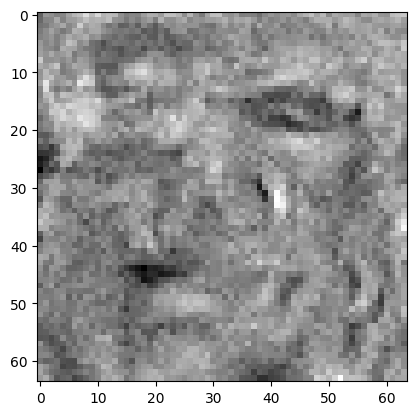

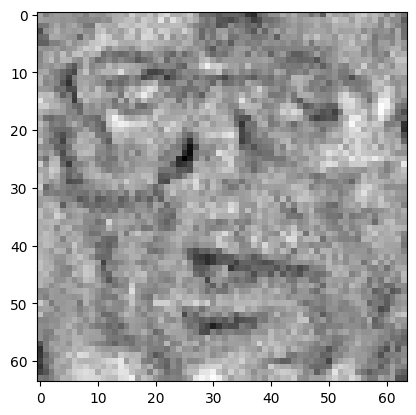

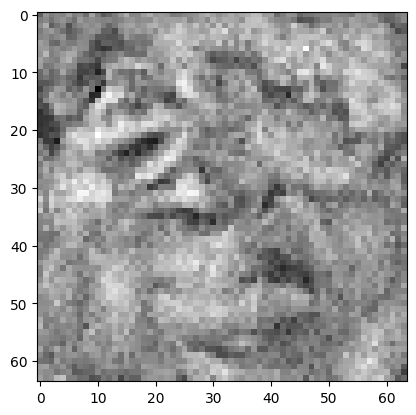

Epoch 22 : 


100%|██████████| 100/100 [00:07<00:00, 13.05it/s]


loss 0.24103003792167446
Epoch 23 : 


100%|██████████| 100/100 [00:07<00:00, 13.44it/s]


loss 0.1948027507055518
Epoch 24 : 


100%|██████████| 100/100 [00:07<00:00, 13.49it/s]


loss 0.22268382402105436
Epoch 25 : 


100%|██████████| 100/100 [00:07<00:00, 13.27it/s]


loss 0.2362636682070329
Epoch 26 : 


100%|██████████| 100/100 [00:07<00:00, 13.55it/s]


loss 0.2299854955087953
Epoch 27 : 


100%|██████████| 100/100 [00:07<00:00, 13.57it/s]


loss 0.22313171511686147
Epoch 28 : 


100%|██████████| 100/100 [00:07<00:00, 13.46it/s]


loss 0.2605136713671386
Epoch 29 : 


100%|██████████| 100/100 [00:07<00:00, 13.18it/s]


loss 0.2019488609302933
Epoch 30 : 


100%|██████████| 100/100 [00:07<00:00, 13.42it/s]


loss 0.21344829075578145
Epoch 31 : 


100%|██████████| 100/100 [00:07<00:00, 13.14it/s]


loss 0.20244095683039
Epoch 32 : 


100%|██████████| 100/100 [00:07<00:00, 13.32it/s]


loss 0.23690225970532025
Epoch 33 : 


100%|██████████| 100/100 [00:07<00:00, 12.86it/s]


loss 0.19305759370543227
Epoch 34 : 


100%|██████████| 100/100 [00:07<00:00, 13.56it/s]


loss 0.2288229643645219
Epoch 35 : 


100%|██████████| 100/100 [00:07<00:00, 13.57it/s]


loss 0.1809552810269431
Epoch 36 : 


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]


loss 0.2300216085482595
Epoch 37 : 


100%|██████████| 100/100 [00:07<00:00, 13.30it/s]


loss 0.23892007924452296
Epoch 38 : 


100%|██████████| 100/100 [00:07<00:00, 13.33it/s]


loss 0.2375169136204612
Epoch 39 : 


100%|██████████| 100/100 [00:07<00:00, 13.25it/s]


loss 0.2080721952273775
Epoch 40 : 


100%|██████████| 100/100 [00:07<00:00, 13.24it/s]


loss 0.25023724240808914
Epoch 41 : 


100%|██████████| 100/100 [00:07<00:00, 13.50it/s]


loss 0.21000867310477853
torch.Size([3, 1, 64, 64])


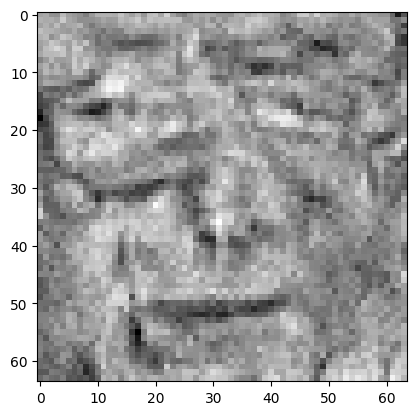

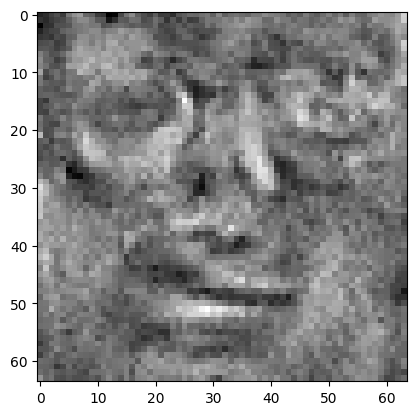

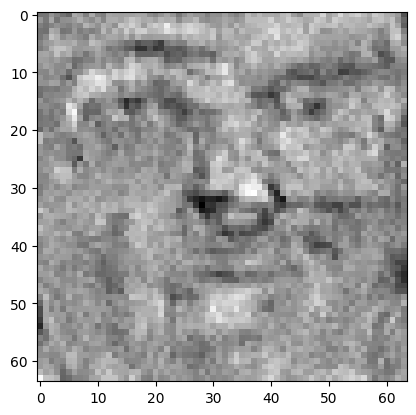

Epoch 42 : 


100%|██████████| 100/100 [00:07<00:00, 13.47it/s]


loss 0.21162836093311566
Epoch 43 : 


100%|██████████| 100/100 [00:07<00:00, 13.47it/s]


loss 0.21040333107254036
Epoch 44 : 


100%|██████████| 100/100 [00:07<00:00, 12.96it/s]


loss 0.21572070558811593
Epoch 45 : 


100%|██████████| 100/100 [00:07<00:00, 13.20it/s]


loss 0.2481680986320028
Epoch 46 : 


100%|██████████| 100/100 [00:07<00:00, 14.00it/s]


loss 0.20318671908818203
Epoch 47 : 


100%|██████████| 100/100 [00:07<00:00, 13.41it/s]


loss 0.20402017376643744
Epoch 48 : 


100%|██████████| 100/100 [00:07<00:00, 13.07it/s]


loss 0.24812082662487067
Epoch 49 : 


100%|██████████| 100/100 [00:07<00:00, 13.50it/s]


loss 0.22872732336256707
Epoch 50 : 


100%|██████████| 100/100 [00:07<00:00, 13.35it/s]


loss 0.2275251694037818
Epoch 51 : 


100%|██████████| 100/100 [00:07<00:00, 13.28it/s]


loss 0.2107731600306949
Epoch 52 : 


100%|██████████| 100/100 [00:07<00:00, 13.38it/s]


loss 0.23927893475633355
Epoch 53 : 


100%|██████████| 100/100 [00:07<00:00, 13.28it/s]


loss 0.22526071793650165
Epoch 54 : 


100%|██████████| 100/100 [00:07<00:00, 13.20it/s]


loss 0.2433489472121493
Epoch 55 : 


100%|██████████| 100/100 [00:07<00:00, 13.59it/s]


loss 0.22852564946824452
Epoch 56 : 


100%|██████████| 100/100 [00:07<00:00, 13.44it/s]


loss 0.22408320840678767
Epoch 57 : 


100%|██████████| 100/100 [00:07<00:00, 13.17it/s]


loss 0.21530828509197775
Epoch 58 : 


100%|██████████| 100/100 [00:07<00:00, 13.21it/s]


loss 0.2370580078295812
Epoch 59 : 


100%|██████████| 100/100 [00:07<00:00, 13.64it/s]


loss 0.2291828443243862
Epoch 60 : 


100%|██████████| 100/100 [00:07<00:00, 13.47it/s]


loss 0.21977813944128566
Epoch 61 : 


100%|██████████| 100/100 [00:07<00:00, 13.43it/s]


loss 0.21389000824288615
torch.Size([3, 1, 64, 64])


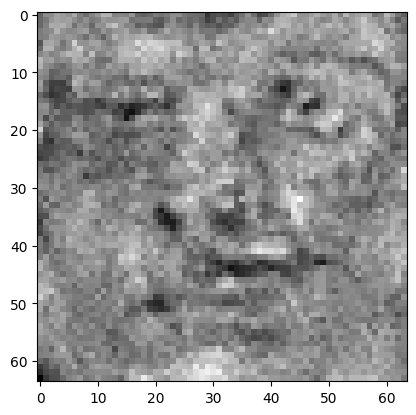

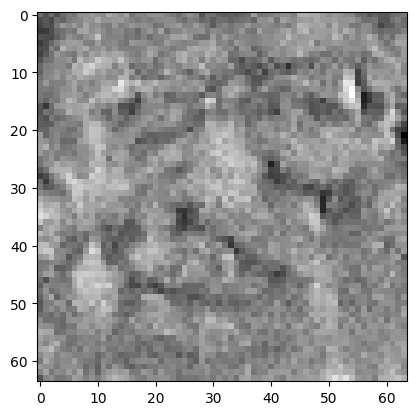

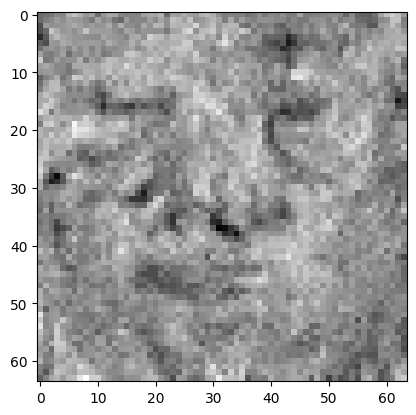

Epoch 62 : 


100%|██████████| 100/100 [00:07<00:00, 13.50it/s]


loss 0.2526821269991668
Epoch 63 : 


100%|██████████| 100/100 [00:07<00:00, 13.25it/s]


loss 0.21737702976525647
Epoch 64 : 


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]


loss 0.19253559787566016
Epoch 65 : 


100%|██████████| 100/100 [00:07<00:00, 13.50it/s]


loss 0.23992686046993472
Epoch 66 : 


100%|██████████| 100/100 [00:07<00:00, 13.47it/s]


loss 0.20660398292435245
Epoch 67 : 


100%|██████████| 100/100 [00:07<00:00, 13.17it/s]


loss 0.1913123503780054
Epoch 68 : 


100%|██████████| 100/100 [00:07<00:00, 13.83it/s]


loss 0.20580040433641508
Epoch 69 : 


100%|██████████| 100/100 [00:07<00:00, 13.03it/s]


loss 0.2055239967693085
Epoch 70 : 


100%|██████████| 100/100 [00:07<00:00, 13.42it/s]


loss 0.2508261524925218
Epoch 71 : 


100%|██████████| 100/100 [00:07<00:00, 13.45it/s]


loss 0.23209475066884153
Epoch 72 : 


100%|██████████| 100/100 [00:07<00:00, 13.66it/s]


loss 0.23763330248499512
Epoch 73 : 


100%|██████████| 100/100 [00:07<00:00, 13.30it/s]


loss 0.23660394456347877
Epoch 74 : 


100%|██████████| 100/100 [00:07<00:00, 13.15it/s]


loss 0.20562421961484345
Epoch 75 : 


100%|██████████| 100/100 [00:07<00:00, 13.35it/s]


loss 0.2004152393564703
Epoch 76 : 


100%|██████████| 100/100 [00:07<00:00, 13.65it/s]


loss 0.20728203048164273
Epoch 77 : 


100%|██████████| 100/100 [00:07<00:00, 13.16it/s]


loss 0.1883611847956848
Epoch 78 : 


100%|██████████| 100/100 [00:07<00:00, 13.35it/s]


loss 0.21583380793663962
Epoch 79 : 


100%|██████████| 100/100 [00:07<00:00, 13.25it/s]


loss 0.19534588047333312
Epoch 80 : 


100%|██████████| 100/100 [00:07<00:00, 13.61it/s]


loss 0.2154489695919918
Epoch 81 : 


100%|██████████| 100/100 [00:07<00:00, 13.43it/s]


loss 0.2059508733553241
torch.Size([3, 1, 64, 64])


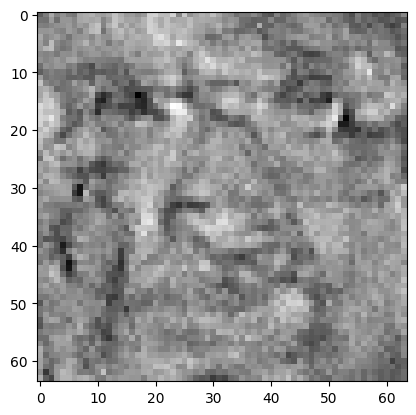

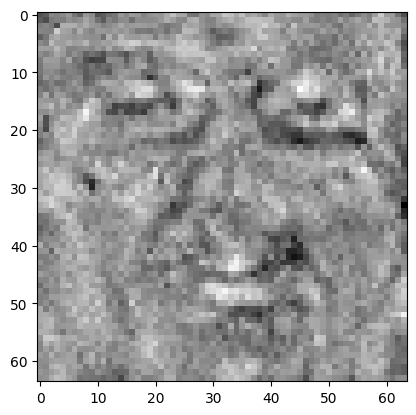

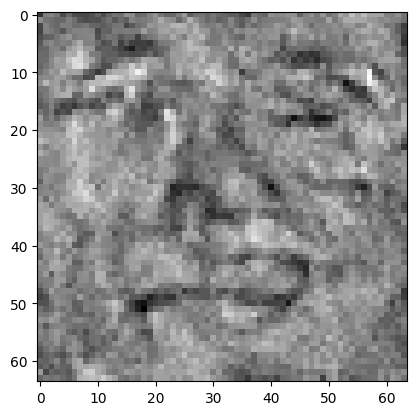

Epoch 82 : 


100%|██████████| 100/100 [00:07<00:00, 13.10it/s]


loss 0.23545753514326848
Epoch 83 : 


100%|██████████| 100/100 [00:07<00:00, 13.44it/s]


loss 0.24727841318692328
Epoch 84 : 


100%|██████████| 100/100 [00:07<00:00, 13.69it/s]


loss 0.21731560907621292
Epoch 85 : 


100%|██████████| 100/100 [00:07<00:00, 13.39it/s]


loss 0.24455714368262416
Epoch 86 : 


100%|██████████| 100/100 [00:07<00:00, 13.42it/s]


loss 0.2617849962328464
Epoch 87 : 


100%|██████████| 100/100 [00:07<00:00, 13.14it/s]


loss 0.2614905626249083
Epoch 88 : 


100%|██████████| 100/100 [00:07<00:00, 13.13it/s]


loss 0.2167888956393125
Epoch 89 : 


100%|██████████| 100/100 [00:07<00:00, 13.51it/s]


loss 0.2160032753472095
Epoch 90 : 


100%|██████████| 100/100 [00:07<00:00, 13.37it/s]


loss 0.3030084166554757
Epoch 91 : 


100%|██████████| 100/100 [00:07<00:00, 13.41it/s]


loss 0.20598470876063166
Epoch 92 : 


100%|██████████| 100/100 [00:07<00:00, 13.62it/s]


loss 0.28794190930884067
Epoch 93 : 


100%|██████████| 100/100 [00:07<00:00, 13.31it/s]


loss 0.21671813852756847
Epoch 94 : 


100%|██████████| 100/100 [00:07<00:00, 13.54it/s]


loss 0.24582743621190342
Epoch 95 : 


100%|██████████| 100/100 [00:07<00:00, 13.78it/s]


loss 0.20240958904123907
Epoch 96 : 


100%|██████████| 100/100 [00:07<00:00, 13.17it/s]


loss 0.22407465745523608
Epoch 97 : 


100%|██████████| 100/100 [00:07<00:00, 13.54it/s]


loss 0.21750982393011958
Epoch 98 : 


100%|██████████| 100/100 [00:07<00:00, 12.98it/s]


loss 0.22444417654344023
Epoch 99 : 


100%|██████████| 100/100 [00:07<00:00, 13.41it/s]


loss 0.2469000784573937
Epoch 100 : 


100%|██████████| 100/100 [00:07<00:00, 14.11it/s]


loss 0.23323625555748695
Epoch 101 : 


100%|██████████| 100/100 [00:07<00:00, 13.45it/s]


loss 0.23077541324562617
torch.Size([3, 1, 64, 64])


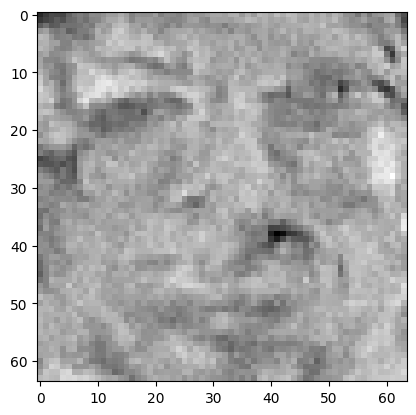

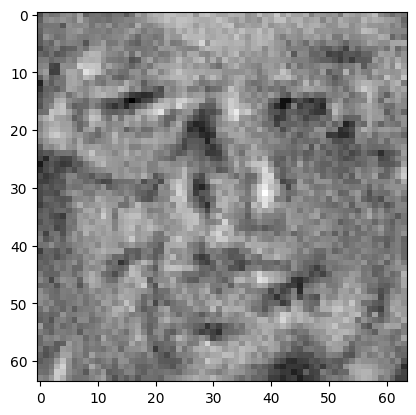

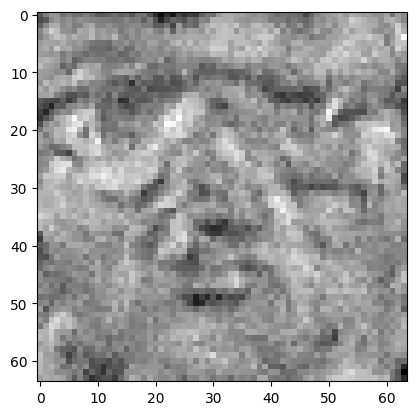

Epoch 102 : 


100%|██████████| 100/100 [00:07<00:00, 13.34it/s]


loss 0.2320729746655764
Epoch 103 : 


100%|██████████| 100/100 [00:07<00:00, 13.18it/s]


loss 0.22419067965251024
Epoch 104 : 


100%|██████████| 100/100 [00:07<00:00, 13.32it/s]


loss 0.23594898682375573
Epoch 105 : 


100%|██████████| 100/100 [00:07<00:00, 13.33it/s]


loss 0.21811101503363678
Epoch 106 : 


100%|██████████| 100/100 [00:07<00:00, 12.94it/s]


loss 0.23176128054509015
Epoch 107 : 


100%|██████████| 100/100 [00:07<00:00, 13.55it/s]


loss 0.23185715580136232
Epoch 108 : 


100%|██████████| 100/100 [00:07<00:00, 13.43it/s]


loss 0.20894975120898246
Epoch 109 : 


100%|██████████| 100/100 [00:07<00:00, 13.28it/s]


loss 0.23113871670398511
Epoch 110 : 


100%|██████████| 100/100 [00:07<00:00, 13.44it/s]


loss 0.23172725265794122
Epoch 111 : 


100%|██████████| 100/100 [00:07<00:00, 13.41it/s]


loss 0.208584165678802
Epoch 112 : 


100%|██████████| 100/100 [00:07<00:00, 12.99it/s]


loss 0.24009965837342662
Epoch 113 : 


100%|██████████| 100/100 [00:07<00:00, 13.57it/s]


loss 0.22254917024839976
Epoch 114 : 


100%|██████████| 100/100 [00:07<00:00, 13.77it/s]


loss 0.20709132846191622
Epoch 115 : 


100%|██████████| 100/100 [00:07<00:00, 13.46it/s]


loss 0.188323922727637
Epoch 116 : 


100%|██████████| 100/100 [00:07<00:00, 13.43it/s]


loss 0.22081301031548048
Epoch 117 : 


100%|██████████| 100/100 [00:07<00:00, 13.47it/s]


loss 0.23447518779575025
Epoch 118 : 


100%|██████████| 100/100 [00:07<00:00, 13.23it/s]


loss 0.21136806348364465
Epoch 119 : 


100%|██████████| 100/100 [00:07<00:00, 13.53it/s]


loss 0.22518146529552513
Epoch 120 : 


100%|██████████| 100/100 [00:07<00:00, 13.39it/s]


loss 0.26346319674667873
Epoch 121 : 


100%|██████████| 100/100 [00:07<00:00, 13.46it/s]


loss 0.2512115933867726
torch.Size([3, 1, 64, 64])


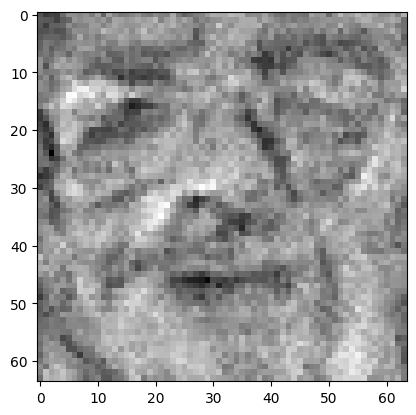

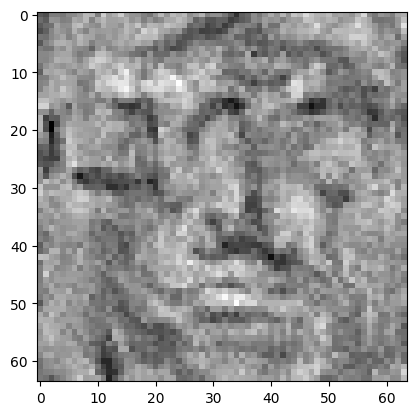

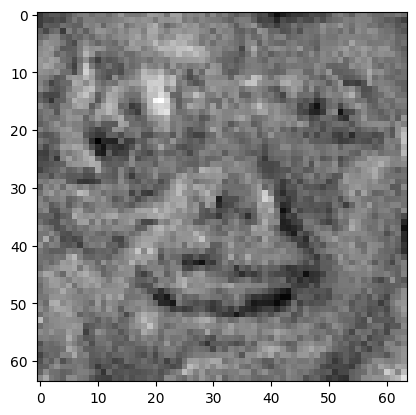

Epoch 122 : 


100%|██████████| 100/100 [00:07<00:00, 13.72it/s]


loss 0.2687882212785071
Epoch 123 : 


100%|██████████| 100/100 [00:07<00:00, 13.60it/s]


loss 0.2180206497493568
Epoch 124 : 


100%|██████████| 100/100 [00:07<00:00, 13.60it/s]


loss 0.2022077821171469
Epoch 125 : 


100%|██████████| 100/100 [00:07<00:00, 13.37it/s]


loss 0.2306838153117762
Epoch 126 : 


100%|██████████| 100/100 [00:07<00:00, 13.30it/s]


loss 0.19285579527444463
Epoch 127 : 


100%|██████████| 100/100 [00:07<00:00, 13.73it/s]


loss 0.2479106844742516
Epoch 128 : 


100%|██████████| 100/100 [00:07<00:00, 13.27it/s]


loss 0.2210274606621095
Epoch 129 : 


100%|██████████| 100/100 [00:07<00:00, 13.40it/s]


loss 0.24830880568741778
Epoch 130 : 


100%|██████████| 100/100 [00:07<00:00, 13.44it/s]


loss 0.2181684596762925
Epoch 131 : 


100%|██████████| 100/100 [00:07<00:00, 13.16it/s]


loss 0.21629235833778268
Epoch 132 : 


100%|██████████| 100/100 [00:07<00:00, 13.48it/s]


loss 0.22938572064403712
Epoch 133 : 


100%|██████████| 100/100 [00:07<00:00, 13.19it/s]


loss 0.21936601505328848
Epoch 134 : 


100%|██████████| 100/100 [00:07<00:00, 12.80it/s]


loss 0.20647657661531213
Epoch 135 : 


100%|██████████| 100/100 [00:07<00:00, 13.33it/s]


loss 0.20861757639139258
Epoch 136 : 


100%|██████████| 100/100 [00:07<00:00, 13.23it/s]


loss 0.22126726627337925
Epoch 137 : 


100%|██████████| 100/100 [00:07<00:00, 12.97it/s]


loss 0.22679250957058408
Epoch 138 : 


100%|██████████| 100/100 [00:07<00:00, 13.31it/s]


loss 0.20565452232686549
Epoch 139 : 


100%|██████████| 100/100 [00:07<00:00, 13.43it/s]


loss 0.19573745350624042
Epoch 140 : 


100%|██████████| 100/100 [00:07<00:00, 13.49it/s]


loss 0.23241505912577612
Epoch 141 : 


100%|██████████| 100/100 [00:07<00:00, 13.25it/s]


loss 0.20566248345255791
torch.Size([3, 1, 64, 64])


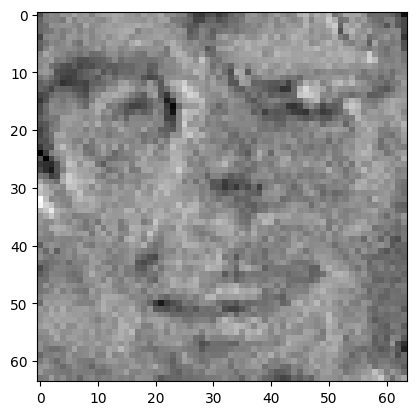

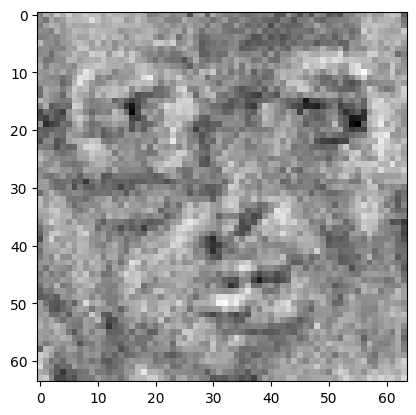

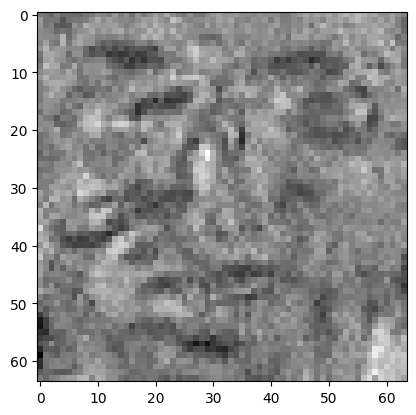

Epoch 142 : 


100%|██████████| 100/100 [00:07<00:00, 13.51it/s]


loss 0.21480152409201808
Epoch 143 : 


100%|██████████| 100/100 [00:07<00:00, 13.34it/s]


loss 0.23144924668479566
Epoch 144 : 


100%|██████████| 100/100 [00:07<00:00, 13.24it/s]


loss 0.2372169807014601
Epoch 145 : 


100%|██████████| 100/100 [00:07<00:00, 13.58it/s]


loss 0.20762259972946642
Epoch 146 : 


100%|██████████| 100/100 [00:07<00:00, 13.17it/s]


loss 0.23916378303995317
Epoch 147 : 


100%|██████████| 100/100 [00:07<00:00, 13.04it/s]


loss 0.21705455175503605
Epoch 148 : 


100%|██████████| 100/100 [00:07<00:00, 13.26it/s]


loss 0.21508042276628095
Epoch 149 : 


100%|██████████| 100/100 [00:07<00:00, 13.44it/s]


loss 0.20259672778091267
Epoch 150 : 


100%|██████████| 100/100 [00:07<00:00, 13.34it/s]


loss 0.20815221657292898
Epoch 151 : 


100%|██████████| 100/100 [00:07<00:00, 12.89it/s]


loss 0.2346471776321996
Epoch 152 : 


100%|██████████| 100/100 [00:07<00:00, 13.24it/s]


loss 0.22914836428919055
Epoch 153 : 


100%|██████████| 100/100 [00:07<00:00, 13.17it/s]


loss 0.19793925057887804
Epoch 154 : 


100%|██████████| 100/100 [00:07<00:00, 13.84it/s]


loss 0.22792743147331876
Epoch 155 : 


100%|██████████| 100/100 [00:07<00:00, 13.15it/s]


loss 0.1766352043503842
Epoch 156 : 


100%|██████████| 100/100 [00:07<00:00, 13.27it/s]


loss 0.20799415628560566
Epoch 157 : 


100%|██████████| 100/100 [00:07<00:00, 13.44it/s]


loss 0.23564587292041186
Epoch 158 : 


100%|██████████| 100/100 [00:07<00:00, 13.24it/s]


loss 0.22781893391059063
Epoch 159 : 


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]


loss 0.19319597386504167
Epoch 160 : 


100%|██████████| 100/100 [00:07<00:00, 13.48it/s]


loss 0.2376821789652107
Epoch 161 : 


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]


loss 0.23293290363394362
torch.Size([3, 1, 64, 64])


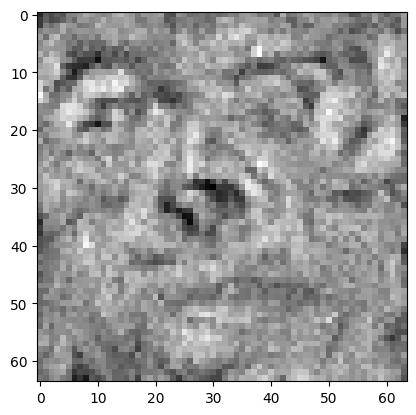

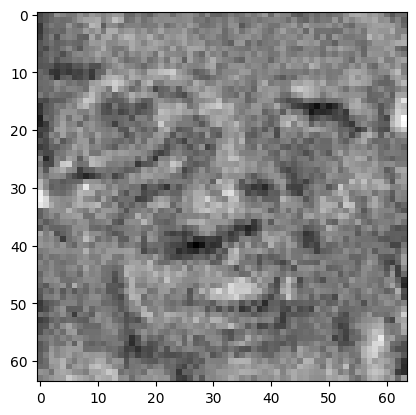

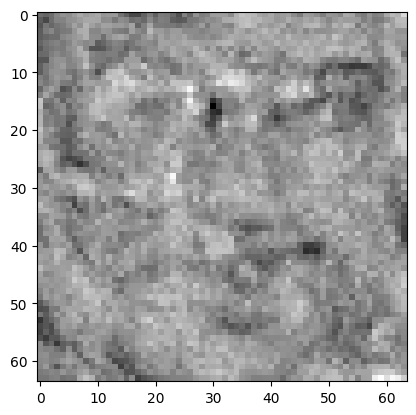

Epoch 162 : 


100%|██████████| 100/100 [00:07<00:00, 13.46it/s]


loss 0.22623144127550876
Epoch 163 : 


100%|██████████| 100/100 [00:07<00:00, 13.36it/s]


loss 0.2206464144976678
Epoch 164 : 


100%|██████████| 100/100 [00:07<00:00, 13.34it/s]


loss 0.2391094338396321
Epoch 165 : 


100%|██████████| 100/100 [00:07<00:00, 13.20it/s]


loss 0.21687790821468808
Epoch 166 : 


100%|██████████| 100/100 [00:07<00:00, 13.20it/s]


loss 0.24913724681243476
Epoch 167 : 


100%|██████████| 100/100 [00:07<00:00, 13.30it/s]


loss 0.25521731669286224
Epoch 168 : 


100%|██████████| 100/100 [00:07<00:00, 13.45it/s]


loss 0.23767724544098096
Epoch 169 : 


100%|██████████| 100/100 [00:07<00:00, 13.13it/s]


loss 0.21551948930399212
Epoch 170 : 


100%|██████████| 100/100 [00:07<00:00, 12.81it/s]


loss 0.22734269780688707
Epoch 171 : 


100%|██████████| 100/100 [00:07<00:00, 13.39it/s]


loss 0.19783798126802418
Epoch 172 : 


100%|██████████| 100/100 [00:07<00:00, 13.50it/s]


loss 0.20887211034979733
Epoch 173 : 


100%|██████████| 100/100 [00:07<00:00, 13.33it/s]


loss 0.20543746701358362
Epoch 174 : 


100%|██████████| 100/100 [00:07<00:00, 13.28it/s]


loss 0.2110823382667146
Epoch 175 : 


100%|██████████| 100/100 [00:07<00:00, 13.30it/s]


loss 0.18903893227731486
Epoch 176 : 


100%|██████████| 100/100 [00:07<00:00, 13.43it/s]


loss 0.226260854849933
Epoch 177 : 


100%|██████████| 100/100 [00:07<00:00, 13.21it/s]


loss 0.20890386117246396
Epoch 178 : 


100%|██████████| 100/100 [00:07<00:00, 13.07it/s]


loss 0.24116333528150902
Epoch 179 : 


100%|██████████| 100/100 [00:07<00:00, 13.26it/s]


loss 0.2106275391670738
Epoch 180 : 


100%|██████████| 100/100 [00:07<00:00, 13.13it/s]


loss 0.210637092804502
Epoch 181 : 


100%|██████████| 100/100 [00:07<00:00, 13.11it/s]


loss 0.23027572511001249
torch.Size([3, 1, 64, 64])


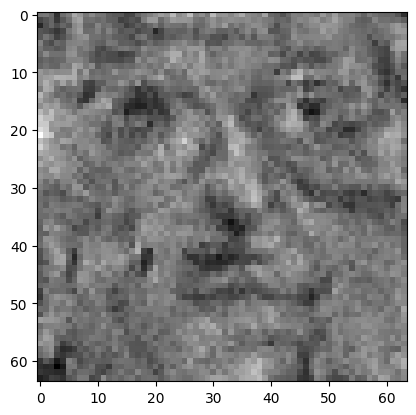

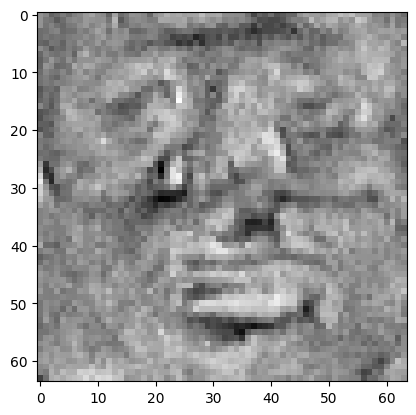

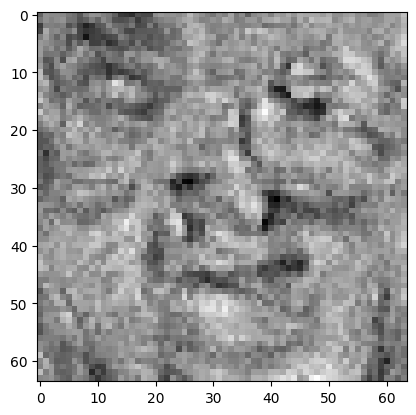

Epoch 182 : 


100%|██████████| 100/100 [00:07<00:00, 13.40it/s]


loss 0.1886504898594882
Epoch 183 : 


100%|██████████| 100/100 [00:07<00:00, 13.37it/s]


loss 0.2305901401080663
Epoch 184 : 


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]


loss 0.21801620423373175
Epoch 185 : 


100%|██████████| 100/100 [00:07<00:00, 13.45it/s]


loss 0.2101641846135339
Epoch 186 : 


100%|██████████| 100/100 [00:07<00:00, 13.10it/s]


loss 0.22045956438366232
Epoch 187 : 


100%|██████████| 100/100 [00:07<00:00, 13.34it/s]


loss 0.20436931858217616
Epoch 188 : 


100%|██████████| 100/100 [00:07<00:00, 13.41it/s]


loss 0.20402024682051934
Epoch 189 : 


100%|██████████| 100/100 [00:07<00:00, 13.46it/s]


loss 0.19061289428857883
Epoch 190 : 


100%|██████████| 100/100 [00:07<00:00, 13.36it/s]


loss 0.22899960610486958
Epoch 191 : 


100%|██████████| 100/100 [00:07<00:00, 13.48it/s]


loss 0.18597639066012434
Epoch 192 : 


100%|██████████| 100/100 [00:07<00:00, 13.13it/s]


loss 0.20814339765207468
Epoch 193 : 


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]


loss 0.23588185163016806
Epoch 194 : 


100%|██████████| 100/100 [00:07<00:00, 13.43it/s]


loss 0.19424147033800276
Epoch 195 : 


100%|██████████| 100/100 [00:07<00:00, 13.34it/s]


loss 0.2239236591704068
Epoch 196 : 


100%|██████████| 100/100 [00:07<00:00, 13.38it/s]


loss 0.2214844726370561
Epoch 197 : 


100%|██████████| 100/100 [00:07<00:00, 13.34it/s]


loss 0.21514460133287144
Epoch 198 : 


100%|██████████| 100/100 [00:07<00:00, 13.40it/s]


loss 0.2332680429384771
Epoch 199 : 


100%|██████████| 100/100 [00:07<00:00, 12.99it/s]


loss 0.2005000954285536
Epoch 200 : 


100%|██████████| 100/100 [00:07<00:00, 13.58it/s]


loss 0.21632118857764668
Epoch 201 : 


100%|██████████| 100/100 [00:07<00:00, 13.40it/s]


loss 0.20452157854700545
torch.Size([3, 1, 64, 64])


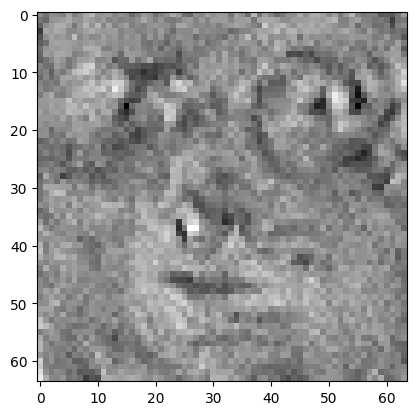

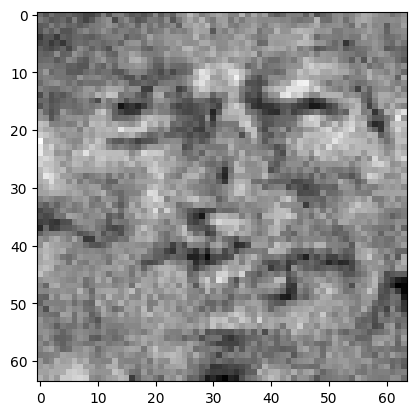

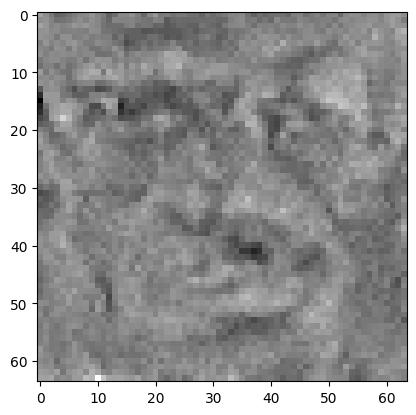

Epoch 202 : 


100%|██████████| 100/100 [00:07<00:00, 13.36it/s]


loss 0.21573014295156945
Epoch 203 : 


100%|██████████| 100/100 [00:07<00:00, 13.53it/s]


loss 0.22360833371844996
Epoch 204 : 


100%|██████████| 100/100 [00:07<00:00, 13.27it/s]


loss 0.23717559769820856
Epoch 205 : 


100%|██████████| 100/100 [00:07<00:00, 13.03it/s]


loss 0.18837675672752338
Epoch 206 : 


100%|██████████| 100/100 [00:07<00:00, 13.33it/s]


loss 0.17694748312443764
Epoch 207 : 


100%|██████████| 100/100 [00:07<00:00, 13.60it/s]


loss 0.23243942391435907
Epoch 208 : 


100%|██████████| 100/100 [00:07<00:00, 13.11it/s]


loss 0.22741594388325542
Epoch 209 : 


100%|██████████| 100/100 [00:07<00:00, 13.27it/s]


loss 0.19163157082401297
Epoch 210 : 


100%|██████████| 100/100 [00:07<00:00, 13.41it/s]


loss 0.22314833901417538
Epoch 211 : 


100%|██████████| 100/100 [00:07<00:00, 13.10it/s]


loss 0.20250831035169828
Epoch 212 : 


100%|██████████| 100/100 [00:07<00:00, 13.44it/s]


loss 0.2536469885414185
Epoch 213 : 


100%|██████████| 100/100 [00:07<00:00, 13.28it/s]


loss 0.2031285089925749
Epoch 214 : 


100%|██████████| 100/100 [00:07<00:00, 13.05it/s]


loss 0.2044700380583187
Epoch 215 : 


100%|██████████| 100/100 [00:07<00:00, 13.46it/s]


loss 0.2684338552889243
Epoch 216 : 


100%|██████████| 100/100 [00:07<00:00, 13.33it/s]


loss 0.20884321229701414
Epoch 217 : 


100%|██████████| 100/100 [00:07<00:00, 13.41it/s]


loss 0.24227622700219698
Epoch 218 : 


100%|██████████| 100/100 [00:07<00:00, 13.06it/s]


loss 0.20952042445959132
Epoch 219 : 


100%|██████████| 100/100 [00:07<00:00, 13.25it/s]


loss 0.1977476571750869
Epoch 220 : 


100%|██████████| 100/100 [00:07<00:00, 13.32it/s]


loss 0.18427973218971222
Epoch 221 : 


100%|██████████| 100/100 [00:07<00:00, 13.05it/s]


loss 0.2178495622144519
torch.Size([3, 1, 64, 64])


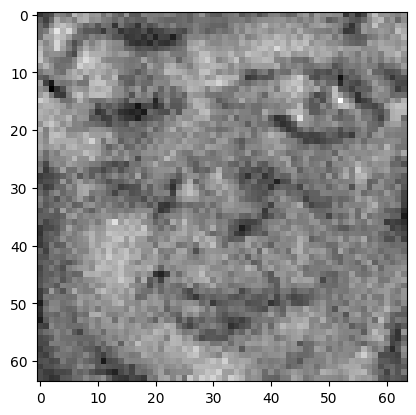

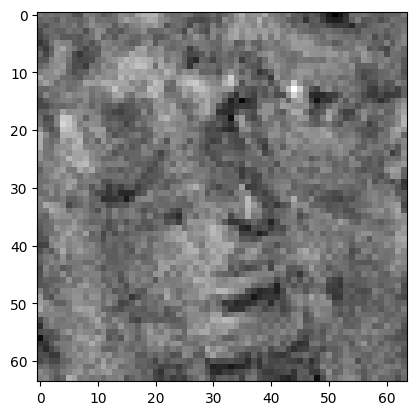

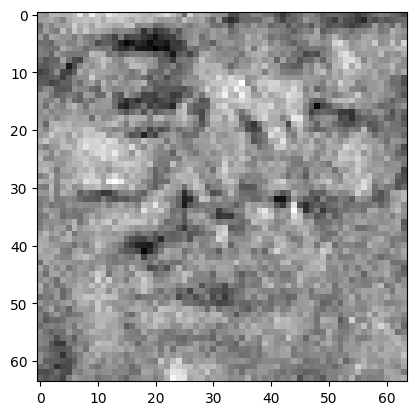

Epoch 222 : 


100%|██████████| 100/100 [00:07<00:00, 13.09it/s]


loss 0.18936796846123768
Epoch 223 : 


100%|██████████| 100/100 [00:07<00:00, 13.17it/s]


loss 0.2387831677966894
Epoch 224 : 


100%|██████████| 100/100 [00:07<00:00, 13.24it/s]


loss 0.1935913003687768
Epoch 225 : 


100%|██████████| 100/100 [00:07<00:00, 13.31it/s]


loss 0.25699021854015136
Epoch 226 : 


100%|██████████| 100/100 [00:07<00:00, 12.97it/s]


loss 0.2513937324235179
Epoch 227 : 


100%|██████████| 100/100 [00:07<00:00, 13.31it/s]


loss 0.1787593752324988
Epoch 228 : 


100%|██████████| 100/100 [00:07<00:00, 13.39it/s]


loss 0.20546001532963784
Epoch 229 : 


100%|██████████| 100/100 [00:07<00:00, 13.09it/s]


loss 0.19343096785029626
Epoch 230 : 


100%|██████████| 100/100 [00:07<00:00, 13.00it/s]


loss 0.22881678310206532
Epoch 231 : 


100%|██████████| 100/100 [00:07<00:00, 13.47it/s]


loss 0.21855215568893005
Epoch 232 : 


100%|██████████| 100/100 [00:07<00:00, 12.94it/s]


loss 0.22176958195179877
Epoch 233 : 


100%|██████████| 100/100 [00:07<00:00, 13.27it/s]


loss 0.183620346503104
Epoch 234 : 


100%|██████████| 100/100 [00:07<00:00, 13.70it/s]


loss 0.1976978957531101
Epoch 235 : 


100%|██████████| 100/100 [00:07<00:00, 12.94it/s]


loss 0.22117507016820684
Epoch 236 : 


100%|██████████| 100/100 [00:07<00:00, 13.37it/s]


loss 0.2168319532003815
Epoch 237 : 


100%|██████████| 100/100 [00:07<00:00, 13.26it/s]


loss 0.21154964490727682
Epoch 238 : 


100%|██████████| 100/100 [00:07<00:00, 13.18it/s]


loss 0.21936714193352536
Epoch 239 : 


100%|██████████| 100/100 [00:07<00:00, 13.50it/s]


loss 0.2660040410745784
Epoch 240 : 


100%|██████████| 100/100 [00:07<00:00, 13.05it/s]


loss 0.20658319612661416
Epoch 241 : 


100%|██████████| 100/100 [00:07<00:00, 13.30it/s]


loss 0.2501402791123752
torch.Size([3, 1, 64, 64])


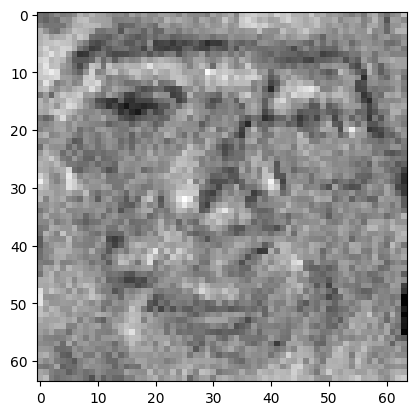

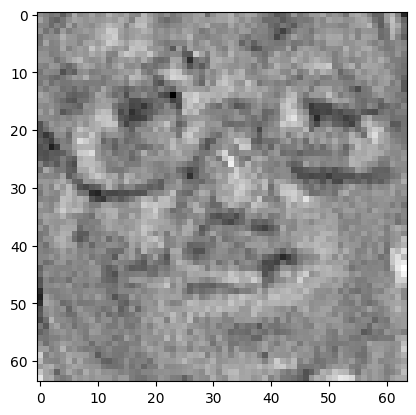

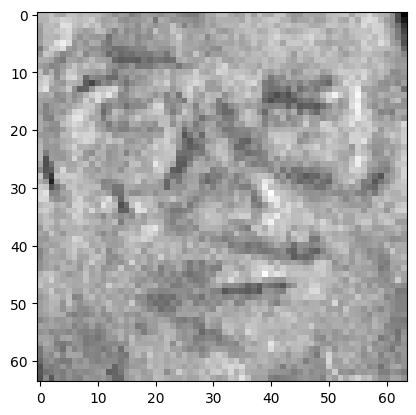

Epoch 242 : 


100%|██████████| 100/100 [00:07<00:00, 13.20it/s]


loss 0.23646612220650257
Epoch 243 : 


100%|██████████| 100/100 [00:07<00:00, 13.09it/s]


loss 0.21661338731802648
Epoch 244 : 


100%|██████████| 100/100 [00:07<00:00, 13.47it/s]


loss 0.2085821445126441
Epoch 245 : 


100%|██████████| 100/100 [00:07<00:00, 13.31it/s]


loss 0.19283408505481753
Epoch 246 : 


100%|██████████| 100/100 [00:07<00:00, 13.31it/s]


loss 0.2156705520817498
Epoch 247 : 


100%|██████████| 100/100 [00:07<00:00, 13.57it/s]


loss 0.21135601349598254
Epoch 248 : 


100%|██████████| 100/100 [00:07<00:00, 13.06it/s]


loss 0.20071815474339033
Epoch 249 : 


100%|██████████| 100/100 [00:07<00:00, 13.23it/s]


loss 0.2262828316947188
Epoch 250 : 


100%|██████████| 100/100 [00:07<00:00, 13.49it/s]


loss 0.22017238859100083
Epoch 251 : 


100%|██████████| 100/100 [00:07<00:00, 13.48it/s]


loss 0.20914976996882664
Epoch 252 : 


100%|██████████| 100/100 [00:07<00:00, 13.13it/s]


loss 0.1919269344835464
Epoch 253 : 


100%|██████████| 100/100 [00:07<00:00, 13.23it/s]


loss 0.2179741798247483
Epoch 254 : 


100%|██████████| 100/100 [00:07<00:00, 13.33it/s]


loss 0.21155308018275143
Epoch 255 : 


100%|██████████| 100/100 [00:07<00:00, 13.52it/s]


loss 0.20808793848220733
Epoch 256 : 


100%|██████████| 100/100 [00:07<00:00, 13.18it/s]


loss 0.19921413932051493
Epoch 257 : 


100%|██████████| 100/100 [00:07<00:00, 13.17it/s]


loss 0.2234901133359338
Epoch 258 : 


100%|██████████| 100/100 [00:07<00:00, 13.32it/s]


loss 0.21174505382013595
Epoch 259 : 


100%|██████████| 100/100 [00:07<00:00, 13.38it/s]


loss 0.2463301411324842
Epoch 260 : 


100%|██████████| 100/100 [00:07<00:00, 13.28it/s]


loss 0.23385318578548112
Epoch 261 : 


100%|██████████| 100/100 [00:07<00:00, 13.56it/s]


loss 0.1669314399904213
torch.Size([3, 1, 64, 64])


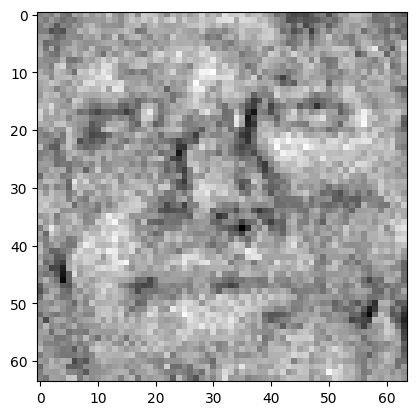

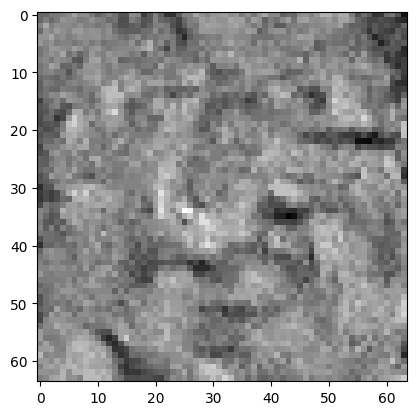

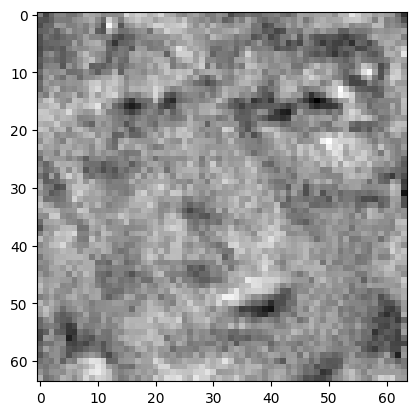

Epoch 262 : 


100%|██████████| 100/100 [00:07<00:00, 13.24it/s]


loss 0.19092165849717047
Epoch 263 : 


100%|██████████| 100/100 [00:07<00:00, 13.59it/s]


loss 0.22085021576394437
Epoch 264 : 


100%|██████████| 100/100 [00:07<00:00, 13.14it/s]


loss 0.25039171038780433
Epoch 265 : 


100%|██████████| 100/100 [00:07<00:00, 13.14it/s]


loss 0.22423749626053485
Epoch 266 : 


100%|██████████| 100/100 [00:07<00:00, 13.45it/s]


loss 0.20695148765155275
Epoch 267 : 


100%|██████████| 100/100 [00:07<00:00, 13.21it/s]


loss 0.226456279406207
Epoch 268 : 


100%|██████████| 100/100 [00:07<00:00, 13.07it/s]


loss 0.1804209390503938
Epoch 269 : 


100%|██████████| 100/100 [00:07<00:00, 13.21it/s]


loss 0.20678549279480146
Epoch 270 : 


100%|██████████| 100/100 [00:07<00:00, 13.36it/s]


loss 0.2001251254511119
Epoch 271 : 


100%|██████████| 100/100 [00:07<00:00, 13.02it/s]


loss 0.19238351629513578
Epoch 272 : 


100%|██████████| 100/100 [00:07<00:00, 13.19it/s]


loss 0.2115793430584875
Epoch 273 : 


100%|██████████| 100/100 [00:07<00:00, 13.24it/s]


loss 0.2430496673263512
Epoch 274 : 


100%|██████████| 100/100 [00:07<00:00, 13.54it/s]


loss 0.23474625588525927
Epoch 275 : 


100%|██████████| 100/100 [00:07<00:00, 13.19it/s]


loss 0.19940231980642328
Epoch 276 : 


100%|██████████| 100/100 [00:07<00:00, 13.09it/s]


loss 0.23845812042277365
Epoch 277 : 


100%|██████████| 100/100 [00:07<00:00, 13.26it/s]


loss 0.2221069378935983
Epoch 278 : 


100%|██████████| 100/100 [00:07<00:00, 13.04it/s]


loss 0.2353259672155528
Epoch 279 : 


100%|██████████| 100/100 [00:07<00:00, 13.12it/s]


loss 0.23041244900504224
Epoch 280 : 


100%|██████████| 100/100 [00:07<00:00, 13.28it/s]


loss 0.24028383578858722
Epoch 281 : 


100%|██████████| 100/100 [00:07<00:00, 13.44it/s]


loss 0.19555893646639308
torch.Size([3, 1, 64, 64])


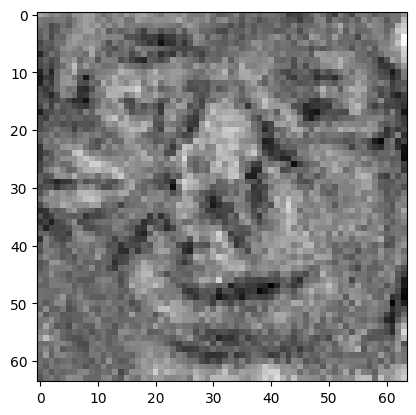

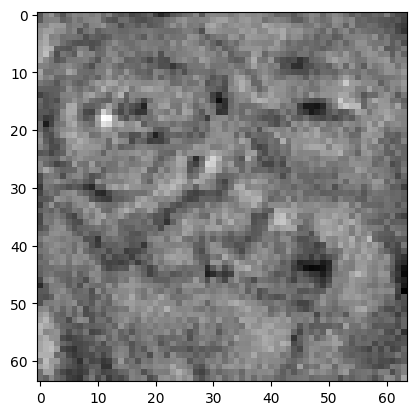

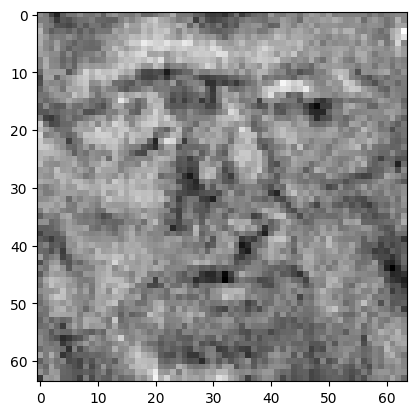

Epoch 282 : 


100%|██████████| 100/100 [00:07<00:00, 13.31it/s]


loss 0.20058827343884297
Epoch 283 : 


100%|██████████| 100/100 [00:07<00:00, 13.18it/s]


loss 0.19200580691185354
Epoch 284 : 


100%|██████████| 100/100 [00:07<00:00, 13.12it/s]


loss 0.20179389887574012
Epoch 285 : 


100%|██████████| 100/100 [00:07<00:00, 13.25it/s]


loss 0.21307078414533687
Epoch 286 : 


100%|██████████| 100/100 [00:07<00:00, 13.17it/s]


loss 0.23974399467409965
Epoch 287 : 


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]


loss 0.19677336881261814
Epoch 288 : 


100%|██████████| 100/100 [00:07<00:00, 12.90it/s]


loss 0.21663574848305683
Epoch 289 : 


100%|██████████| 100/100 [00:07<00:00, 13.24it/s]


loss 0.19370248262550094
Epoch 290 : 


100%|██████████| 100/100 [00:07<00:00, 13.17it/s]


loss 0.1933032406745232
Epoch 291 : 


100%|██████████| 100/100 [00:07<00:00, 13.03it/s]


loss 0.20444736104263264
Epoch 292 : 


100%|██████████| 100/100 [00:07<00:00, 13.14it/s]


loss 0.20199307326194674
Epoch 293 : 


100%|██████████| 100/100 [00:07<00:00, 13.10it/s]


loss 0.20919290625800027
Epoch 294 : 


100%|██████████| 100/100 [00:07<00:00, 12.98it/s]


loss 0.23348602161544257
Epoch 295 : 


100%|██████████| 100/100 [00:07<00:00, 13.42it/s]


loss 0.21510927551812242
Epoch 296 : 


100%|██████████| 100/100 [00:07<00:00, 13.30it/s]


loss 0.2422954697059317
Epoch 297 : 


100%|██████████| 100/100 [00:07<00:00, 13.24it/s]


loss 0.21926292900132377
Epoch 298 : 


100%|██████████| 100/100 [00:07<00:00, 13.15it/s]


loss 0.21396193341273195
Epoch 299 : 


100%|██████████| 100/100 [00:07<00:00, 13.49it/s]


loss 0.24485638773955468
Epoch 300 : 


100%|██████████| 100/100 [00:07<00:00, 13.06it/s]


loss 0.2365035981583685
Epoch 301 : 


100%|██████████| 100/100 [00:07<00:00, 13.09it/s]


loss 0.24576538563495842
torch.Size([3, 1, 64, 64])


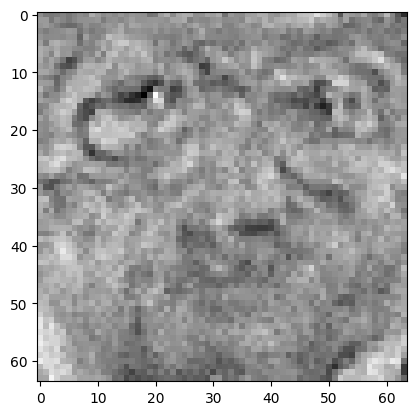

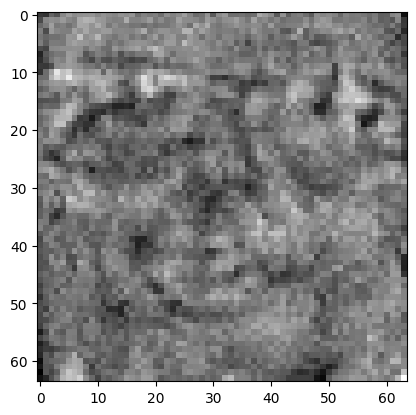

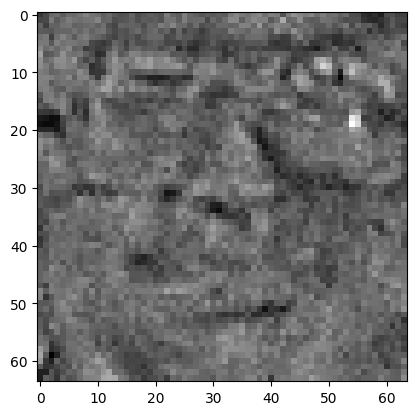

Epoch 302 : 


100%|██████████| 100/100 [00:07<00:00, 13.30it/s]


loss 0.2626156517771006
Epoch 303 : 


100%|██████████| 100/100 [00:07<00:00, 13.32it/s]


loss 0.19955591199631623
Epoch 304 : 


100%|██████████| 100/100 [00:07<00:00, 13.36it/s]


loss 0.2347438505572679
Epoch 305 : 


100%|██████████| 100/100 [00:07<00:00, 12.98it/s]


loss 0.23355902170278875
Epoch 306 : 


100%|██████████| 100/100 [00:07<00:00, 13.16it/s]


loss 0.19951203954161464
Epoch 307 : 


100%|██████████| 100/100 [00:07<00:00, 13.26it/s]


loss 0.20747281761796196
Epoch 308 : 


100%|██████████| 100/100 [00:07<00:00, 13.33it/s]


loss 0.21682398955377488
Epoch 309 : 


100%|██████████| 100/100 [00:07<00:00, 12.86it/s]


loss 0.22628617914581625
Epoch 310 : 


100%|██████████| 100/100 [00:07<00:00, 13.23it/s]


loss 0.23547335295483
Epoch 311 : 


100%|██████████| 100/100 [00:07<00:00, 13.23it/s]


loss 0.20532112410697825
Epoch 312 : 


100%|██████████| 100/100 [00:07<00:00, 13.04it/s]


loss 0.21277384019135864
Epoch 313 : 


100%|██████████| 100/100 [00:07<00:00, 13.70it/s]


loss 0.22588947502775722
Epoch 314 : 


100%|██████████| 100/100 [00:07<00:00, 13.26it/s]


loss 0.20708624607267717
Epoch 315 : 


100%|██████████| 100/100 [00:07<00:00, 13.32it/s]


loss 0.24322321892359777
Epoch 316 : 


100%|██████████| 100/100 [00:07<00:00, 13.66it/s]


loss 0.2007066953253003
Epoch 317 : 


100%|██████████| 100/100 [00:07<00:00, 13.64it/s]


loss 0.2011256505563147
Epoch 318 : 


100%|██████████| 100/100 [00:07<00:00, 13.14it/s]


loss 0.20530416938311835
Epoch 319 : 


100%|██████████| 100/100 [00:07<00:00, 13.41it/s]


loss 0.17564929040060595
Epoch 320 : 


100%|██████████| 100/100 [00:07<00:00, 13.18it/s]


loss 0.21720203302237737
Epoch 321 : 


100%|██████████| 100/100 [00:07<00:00, 12.95it/s]


loss 0.23426556405698817
torch.Size([3, 1, 64, 64])


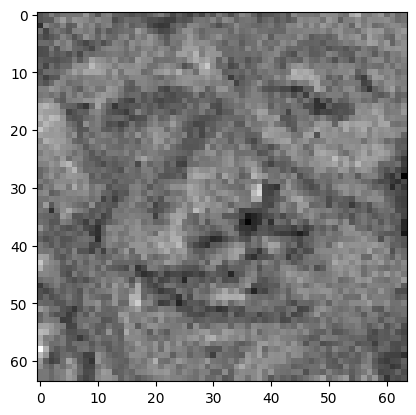

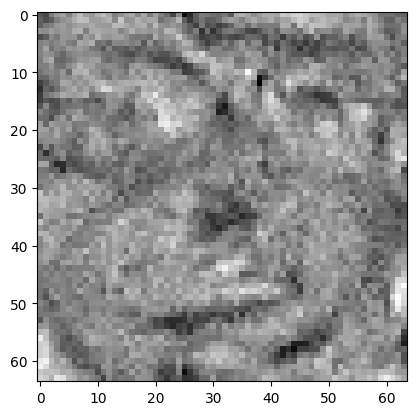

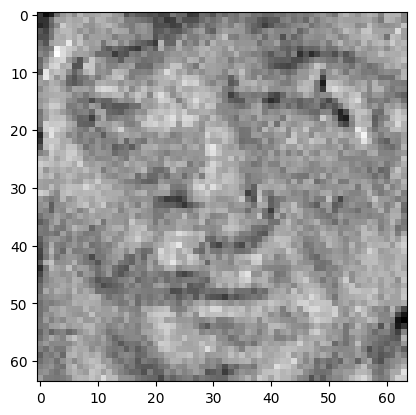

Epoch 322 : 


100%|██████████| 100/100 [00:07<00:00, 13.00it/s]


loss 0.19709126813136876
Epoch 323 : 


100%|██████████| 100/100 [00:07<00:00, 13.14it/s]


loss 0.2025331042480072
Epoch 324 : 


100%|██████████| 100/100 [00:07<00:00, 13.33it/s]


loss 0.22714780842263124
Epoch 325 : 


100%|██████████| 100/100 [00:07<00:00, 13.05it/s]


loss 0.22684253942462715
Epoch 326 : 


100%|██████████| 100/100 [00:07<00:00, 13.11it/s]


loss 0.23451426798775352
Epoch 327 : 


100%|██████████| 100/100 [00:07<00:00, 13.08it/s]


loss 0.21113139198005257
Epoch 328 : 


100%|██████████| 100/100 [00:07<00:00, 13.34it/s]


loss 0.20349154133761604
Epoch 329 : 


100%|██████████| 100/100 [00:07<00:00, 13.30it/s]


loss 0.2181456966266464
Epoch 330 : 


100%|██████████| 100/100 [00:07<00:00, 12.97it/s]


loss 0.2500007991423153
Epoch 331 : 


100%|██████████| 100/100 [00:07<00:00, 13.13it/s]


loss 0.19942780925630235
Epoch 332 : 


100%|██████████| 100/100 [00:07<00:00, 13.28it/s]


loss 0.20824516973400964
Epoch 333 : 


100%|██████████| 100/100 [00:07<00:00, 13.59it/s]


loss 0.2252036472154545
Epoch 334 : 


100%|██████████| 100/100 [00:07<00:00, 13.34it/s]


loss 0.19776740225367512
Epoch 335 : 


100%|██████████| 100/100 [00:07<00:00, 13.36it/s]


loss 0.20802069980115334
Epoch 336 : 


100%|██████████| 100/100 [00:07<00:00, 13.28it/s]


loss 0.2176874380197521
Epoch 337 : 


100%|██████████| 100/100 [00:07<00:00, 13.32it/s]


loss 0.20424230005857097
Epoch 338 : 


100%|██████████| 100/100 [00:07<00:00, 12.98it/s]


loss 0.18319878522663713
Epoch 339 : 


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]


loss 0.2146835858738462
Epoch 340 : 


100%|██████████| 100/100 [00:07<00:00, 13.68it/s]


loss 0.20525975580610673
Epoch 341 : 


100%|██████████| 100/100 [00:07<00:00, 13.11it/s]


loss 0.18789284369949072
torch.Size([3, 1, 64, 64])


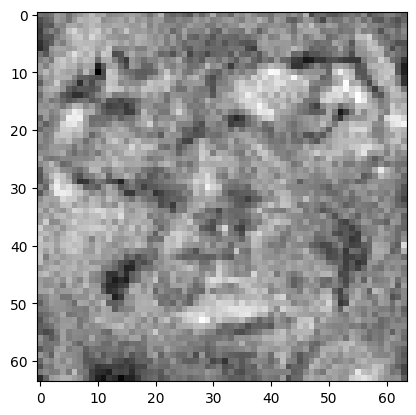

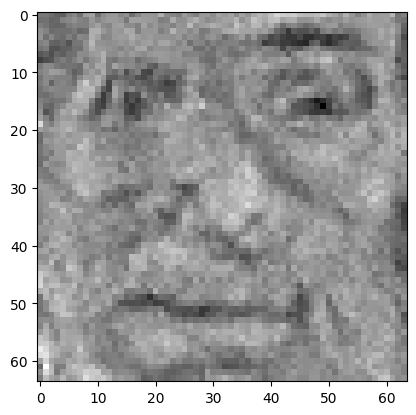

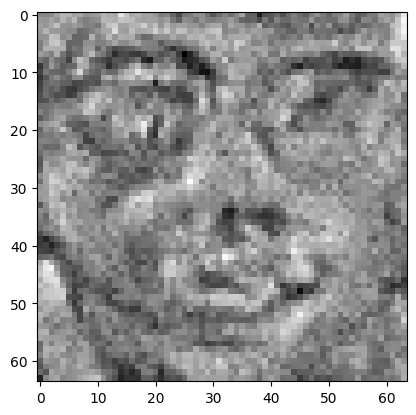

Epoch 342 : 


100%|██████████| 100/100 [00:07<00:00, 13.41it/s]


loss 0.22515737275076328
Epoch 343 : 


100%|██████████| 100/100 [00:07<00:00, 13.38it/s]


loss 0.2511363053599315
Epoch 344 : 


100%|██████████| 100/100 [00:07<00:00, 13.44it/s]


loss 0.19307637321533058
Epoch 345 : 


100%|██████████| 100/100 [00:07<00:00, 13.52it/s]


loss 0.23279843925481167
Epoch 346 : 


100%|██████████| 100/100 [00:07<00:00, 13.23it/s]


loss 0.19917541154506888
Epoch 347 : 


100%|██████████| 100/100 [00:07<00:00, 13.01it/s]


loss 0.2118172988551445
Epoch 348 : 


100%|██████████| 100/100 [00:07<00:00, 13.19it/s]


loss 0.23104021592155316
Epoch 349 : 


100%|██████████| 100/100 [00:07<00:00, 13.26it/s]


loss 0.2556797398459947
Epoch 350 : 


100%|██████████| 100/100 [00:07<00:00, 13.52it/s]


loss 0.22426907532596052
Epoch 351 : 


100%|██████████| 100/100 [00:07<00:00, 13.35it/s]


loss 0.22678182986759537
Epoch 352 : 


100%|██████████| 100/100 [00:07<00:00, 13.54it/s]


loss 0.18696533636901633
Epoch 353 : 


100%|██████████| 100/100 [00:07<00:00, 13.38it/s]


loss 0.219635478506307
Epoch 354 : 


100%|██████████| 100/100 [00:07<00:00, 13.21it/s]


loss 0.2085087274127617
Epoch 355 : 


100%|██████████| 100/100 [00:07<00:00, 13.31it/s]


loss 0.208984631771645
Epoch 356 : 


100%|██████████| 100/100 [00:07<00:00, 12.98it/s]


loss 0.18726474940468762
Epoch 357 : 


100%|██████████| 100/100 [00:07<00:00, 13.23it/s]


loss 0.22975291959845334
Epoch 358 : 


100%|██████████| 100/100 [00:07<00:00, 13.26it/s]


loss 0.2100750810022381
Epoch 359 : 


100%|██████████| 100/100 [00:07<00:00, 13.33it/s]


loss 0.1953204790565428
Epoch 360 : 


100%|██████████| 100/100 [00:07<00:00, 13.11it/s]


loss 0.18064259461409568
Epoch 361 : 


100%|██████████| 100/100 [00:07<00:00, 13.20it/s]


loss 0.2331538019085137
torch.Size([3, 1, 64, 64])


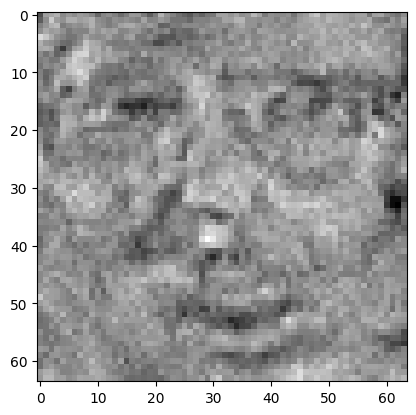

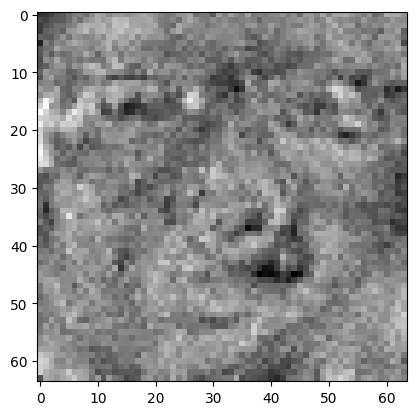

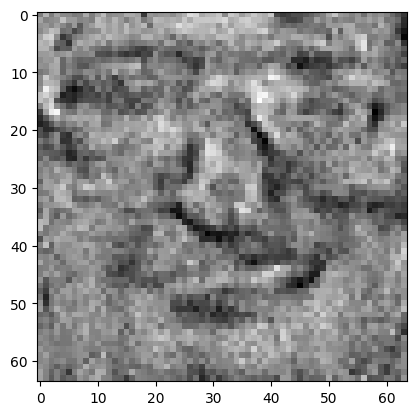

Epoch 362 : 


100%|██████████| 100/100 [00:07<00:00, 13.61it/s]


loss 0.2143820974104413
Epoch 363 : 


100%|██████████| 100/100 [00:07<00:00, 13.32it/s]


loss 0.21545992874067935
Epoch 364 : 


100%|██████████| 100/100 [00:07<00:00, 13.23it/s]


loss 0.2240723846033922
Epoch 365 : 


100%|██████████| 100/100 [00:07<00:00, 13.10it/s]


loss 0.19304352558486626
Epoch 366 : 


100%|██████████| 100/100 [00:07<00:00, 13.45it/s]


loss 0.23533428718365187
Epoch 367 : 


100%|██████████| 100/100 [00:07<00:00, 13.51it/s]


loss 0.23595496751675146
Epoch 368 : 


100%|██████████| 100/100 [00:07<00:00, 13.76it/s]


loss 0.22246240512865045
Epoch 369 : 


100%|██████████| 100/100 [00:07<00:00, 12.98it/s]


loss 0.19826752460043134
Epoch 370 : 


100%|██████████| 100/100 [00:07<00:00, 13.60it/s]


loss 0.25332420269040334
Epoch 371 : 


100%|██████████| 100/100 [00:07<00:00, 13.33it/s]


loss 0.22547314068604307
Epoch 372 : 


100%|██████████| 100/100 [00:07<00:00, 13.46it/s]


loss 0.22746079009203748
Epoch 373 : 


100%|██████████| 100/100 [00:07<00:00, 13.52it/s]


loss 0.21853069380843512
Epoch 374 : 


100%|██████████| 100/100 [00:07<00:00, 13.17it/s]


loss 0.2171061920580786
Epoch 375 : 


100%|██████████| 100/100 [00:07<00:00, 13.27it/s]


loss 0.20370487812831825
Epoch 376 : 


100%|██████████| 100/100 [00:07<00:00, 13.53it/s]


loss 0.20141091858444043
Epoch 377 : 


100%|██████████| 100/100 [00:07<00:00, 13.12it/s]


loss 0.24850060595888282
Epoch 378 : 


100%|██████████| 100/100 [00:07<00:00, 13.27it/s]


loss 0.21963656240374912
Epoch 379 : 


100%|██████████| 100/100 [00:07<00:00, 13.61it/s]


loss 0.23350276635240602
Epoch 380 : 


100%|██████████| 100/100 [00:07<00:00, 13.14it/s]


loss 0.2144852460251533
Epoch 381 : 


100%|██████████| 100/100 [00:07<00:00, 13.60it/s]


loss 0.20074208236069105
torch.Size([3, 1, 64, 64])


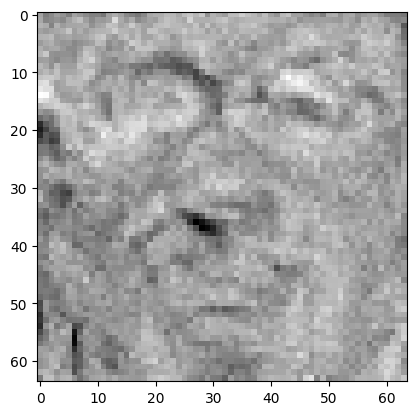

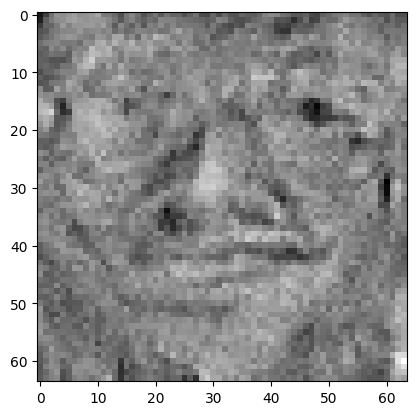

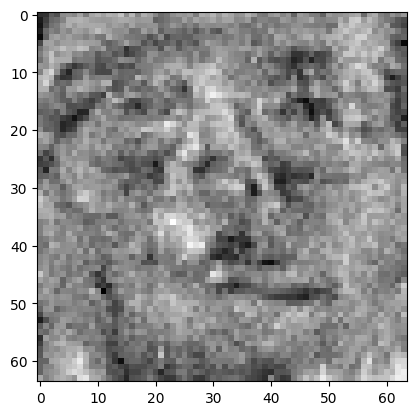

Epoch 382 : 


100%|██████████| 100/100 [00:07<00:00, 13.41it/s]


loss 0.2068261220439928
Epoch 383 : 


100%|██████████| 100/100 [00:07<00:00, 13.26it/s]


loss 0.22952631063732806
Epoch 384 : 


100%|██████████| 100/100 [00:07<00:00, 13.73it/s]


loss 0.20832840248677972
Epoch 385 : 


100%|██████████| 100/100 [00:07<00:00, 13.61it/s]


loss 0.22045174586902994
Epoch 386 : 


100%|██████████| 100/100 [00:07<00:00, 12.97it/s]


loss 0.20741189403674393
Epoch 387 : 


100%|██████████| 100/100 [00:07<00:00, 13.09it/s]


loss 0.22592355444522705
Epoch 388 : 


100%|██████████| 100/100 [00:07<00:00, 13.44it/s]


loss 0.23475545447647647
Epoch 389 : 


100%|██████████| 100/100 [00:07<00:00, 13.38it/s]


loss 0.2221867104626157
Epoch 390 : 


100%|██████████| 100/100 [00:07<00:00, 13.46it/s]


loss 0.19034476778962464
Epoch 391 : 


100%|██████████| 100/100 [00:07<00:00, 13.23it/s]


loss 0.214430410973732
Epoch 392 : 


100%|██████████| 100/100 [00:07<00:00, 13.30it/s]


loss 0.1958456239608574
Epoch 393 : 


100%|██████████| 100/100 [00:07<00:00, 13.10it/s]


loss 0.22138270732831225
Epoch 394 : 


100%|██████████| 100/100 [00:07<00:00, 13.31it/s]


loss 0.22691834396890495
Epoch 395 : 


100%|██████████| 100/100 [00:07<00:00, 13.48it/s]


loss 0.2228212181129357
Epoch 396 : 


100%|██████████| 100/100 [00:07<00:00, 13.06it/s]


loss 0.23096737599093953
Epoch 397 : 


100%|██████████| 100/100 [00:07<00:00, 13.05it/s]


loss 0.2216651940663162
Epoch 398 : 


100%|██████████| 100/100 [00:07<00:00, 13.21it/s]


loss 0.19796924658803428
Epoch 399 : 


100%|██████████| 100/100 [00:07<00:00, 13.37it/s]


loss 0.20235226275965956
Epoch 400 : 


100%|██████████| 100/100 [00:07<00:00, 13.53it/s]


loss 0.20844575725475165
Epoch 401 : 


100%|██████████| 100/100 [00:07<00:00, 13.43it/s]


loss 0.1921896425097704
torch.Size([3, 1, 64, 64])


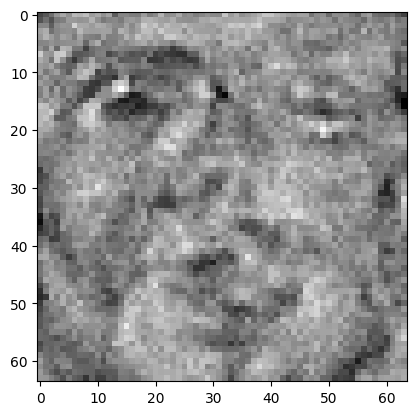

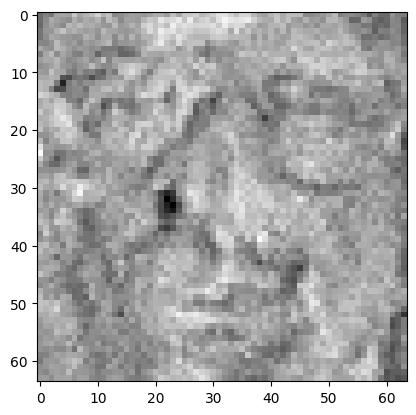

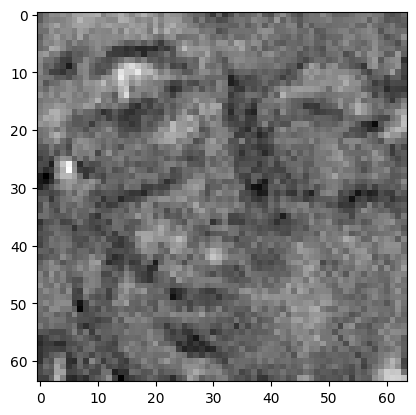

Epoch 402 : 


100%|██████████| 100/100 [00:07<00:00, 13.30it/s]


loss 0.2552106721790445
Epoch 403 : 


100%|██████████| 100/100 [00:07<00:00, 13.50it/s]


loss 0.18411768065680992
Epoch 404 : 


100%|██████████| 100/100 [00:07<00:00, 13.38it/s]


loss 0.21748694713827688
Epoch 405 : 


100%|██████████| 100/100 [00:07<00:00, 13.22it/s]


loss 0.2101089759863728
Epoch 406 : 


100%|██████████| 100/100 [00:07<00:00, 13.72it/s]


loss 0.24226316576733722
Epoch 407 : 


100%|██████████| 100/100 [00:07<00:00, 13.30it/s]


loss 0.18710698661166406
Epoch 408 : 


100%|██████████| 100/100 [00:07<00:00, 13.12it/s]


loss 0.2117862711980596
Epoch 409 : 


100%|██████████| 100/100 [00:07<00:00, 13.20it/s]


loss 0.17352987690069976
Epoch 410 : 


100%|██████████| 100/100 [00:07<00:00, 13.41it/s]


loss 0.19076626467792096
Epoch 411 : 


100%|██████████| 100/100 [00:07<00:00, 13.64it/s]


loss 0.2327592985479829
Epoch 412 : 


100%|██████████| 100/100 [00:07<00:00, 13.33it/s]


loss 0.2469298776367144
Epoch 413 : 


100%|██████████| 100/100 [00:07<00:00, 13.14it/s]


loss 0.19758473183304942
Epoch 414 : 


100%|██████████| 100/100 [00:07<00:00, 13.44it/s]


loss 0.19092460359680824
Epoch 415 : 


100%|██████████| 100/100 [00:07<00:00, 13.26it/s]


loss 0.2187295018820542
Epoch 416 : 


100%|██████████| 100/100 [00:07<00:00, 13.31it/s]


loss 0.2052222426183448
Epoch 417 : 


100%|██████████| 100/100 [00:07<00:00, 13.32it/s]


loss 0.21169568235453054
Epoch 418 : 


100%|██████████| 100/100 [00:07<00:00, 13.09it/s]


loss 0.20022986814269286
Epoch 419 : 


100%|██████████| 100/100 [00:07<00:00, 13.60it/s]


loss 0.23703601201463426
Epoch 420 : 


100%|██████████| 100/100 [00:07<00:00, 13.35it/s]


loss 0.25354173121175244
Epoch 421 : 


100%|██████████| 100/100 [00:07<00:00, 13.51it/s]


loss 0.21353901689320626
torch.Size([3, 1, 64, 64])


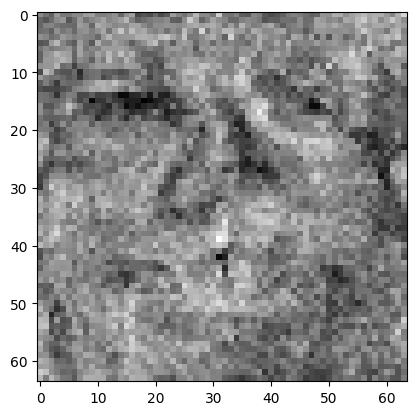

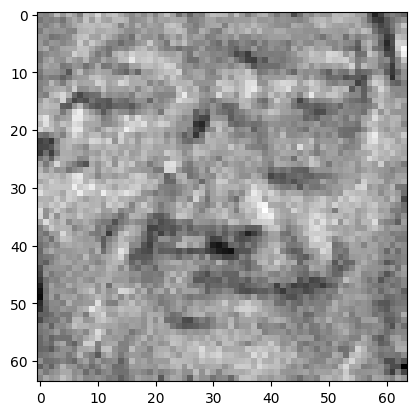

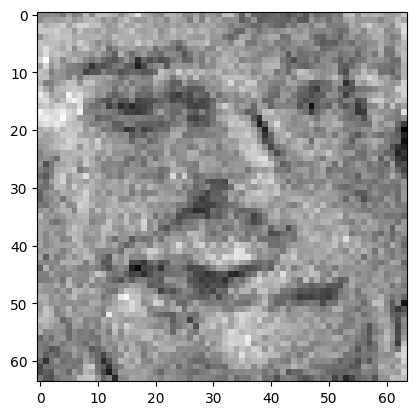

Epoch 422 : 


100%|██████████| 100/100 [00:07<00:00, 13.52it/s]


loss 0.19828522450220068
Epoch 423 : 


100%|██████████| 100/100 [00:07<00:00, 13.17it/s]


loss 0.26071621138455503
Epoch 424 : 


100%|██████████| 100/100 [00:07<00:00, 13.21it/s]


loss 0.20846805631147608
Epoch 425 : 


100%|██████████| 100/100 [00:07<00:00, 13.25it/s]


loss 0.19931887430602588
Epoch 426 : 


100%|██████████| 100/100 [00:07<00:00, 13.30it/s]


loss 0.20979664210243995
Epoch 427 : 


100%|██████████| 100/100 [00:07<00:00, 13.57it/s]


loss 0.21003299546665608
Epoch 428 : 


100%|██████████| 100/100 [00:07<00:00, 13.59it/s]


loss 0.21121894396576796
Epoch 429 : 


100%|██████████| 100/100 [00:07<00:00, 13.41it/s]


loss 0.20742511196759986
Epoch 430 : 


100%|██████████| 100/100 [00:07<00:00, 13.28it/s]


loss 0.19297126588148278
Epoch 431 : 


100%|██████████| 100/100 [00:07<00:00, 12.75it/s]


loss 0.21377446886560586
Epoch 432 : 


100%|██████████| 100/100 [00:07<00:00, 13.04it/s]


loss 0.23443332920791113
Epoch 433 : 


100%|██████████| 100/100 [00:07<00:00, 13.05it/s]


loss 0.17556330840884332
Epoch 434 : 


100%|██████████| 100/100 [00:07<00:00, 13.43it/s]


loss 0.21864295864537725
Epoch 435 : 


100%|██████████| 100/100 [00:07<00:00, 13.08it/s]


loss 0.20841019615873926
Epoch 436 : 


100%|██████████| 100/100 [00:07<00:00, 13.20it/s]


loss 0.18961117529540095
Epoch 437 : 


100%|██████████| 100/100 [00:07<00:00, 12.80it/s]


loss 0.23952466755852914
Epoch 438 : 


100%|██████████| 100/100 [00:07<00:00, 13.12it/s]


loss 0.22012010255750708
Epoch 439 : 


100%|██████████| 100/100 [00:07<00:00, 13.10it/s]


loss 0.2165008324238641
Epoch 440 : 


100%|██████████| 100/100 [00:07<00:00, 13.26it/s]


loss 0.20787927849433047
Epoch 441 : 


100%|██████████| 100/100 [00:07<00:00, 13.41it/s]


loss 0.2318318195342809
torch.Size([3, 1, 64, 64])


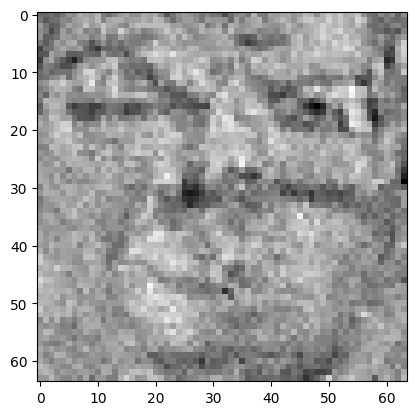

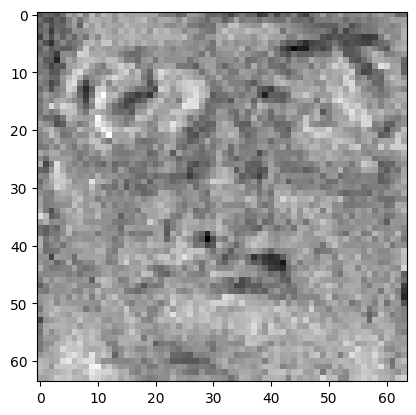

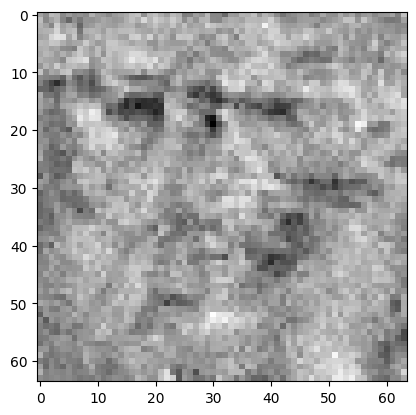

Epoch 442 : 


100%|██████████| 100/100 [00:07<00:00, 13.22it/s]


loss 0.20309112986722125
Epoch 443 : 


100%|██████████| 100/100 [00:07<00:00, 13.05it/s]


loss 0.20619158102939905
Epoch 444 : 


100%|██████████| 100/100 [00:07<00:00, 13.56it/s]


loss 0.22279959559527623
Epoch 445 : 


100%|██████████| 100/100 [00:07<00:00, 13.31it/s]


loss 0.2168230773833594
Epoch 446 : 


100%|██████████| 100/100 [00:07<00:00, 13.14it/s]


loss 0.22031529039802328
Epoch 447 : 


100%|██████████| 100/100 [00:07<00:00, 13.58it/s]


loss 0.21863361463689682
Epoch 448 : 


100%|██████████| 100/100 [00:07<00:00, 13.20it/s]


loss 0.20771417966689715
Epoch 449 : 


100%|██████████| 100/100 [00:07<00:00, 13.47it/s]


loss 0.18834869015916567
Epoch 450 : 


100%|██████████| 100/100 [00:07<00:00, 13.18it/s]


loss 0.1907849614529162
Epoch 451 : 


100%|██████████| 100/100 [00:07<00:00, 13.12it/s]


loss 0.2136693963536097
Epoch 452 : 


100%|██████████| 100/100 [00:07<00:00, 13.38it/s]


loss 0.20424429532982966
Epoch 453 : 


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]


loss 0.2310312314537915
Epoch 454 : 


100%|██████████| 100/100 [00:07<00:00, 13.31it/s]


loss 0.20555258943462623
Epoch 455 : 


100%|██████████| 100/100 [00:07<00:00, 13.03it/s]


loss 0.23829613793195165
Epoch 456 : 


100%|██████████| 100/100 [00:07<00:00, 13.39it/s]


loss 0.22172894417094371
Epoch 457 : 


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]


loss 0.222707351462143
Epoch 458 : 


100%|██████████| 100/100 [00:07<00:00, 13.33it/s]


loss 0.25023155158788135
Epoch 459 : 


100%|██████████| 100/100 [00:07<00:00, 13.23it/s]


loss 0.22170996111537897
Epoch 460 : 


100%|██████████| 100/100 [00:07<00:00, 13.26it/s]


loss 0.204449812474984
Epoch 461 : 


100%|██████████| 100/100 [00:07<00:00, 13.62it/s]


loss 0.1937159667345661
torch.Size([3, 1, 64, 64])


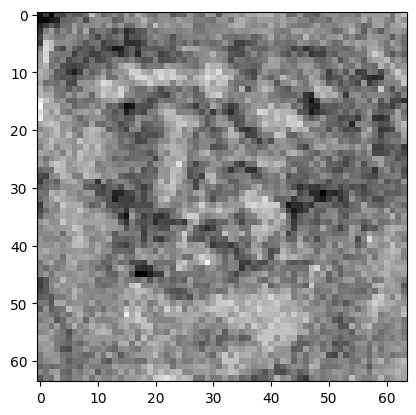

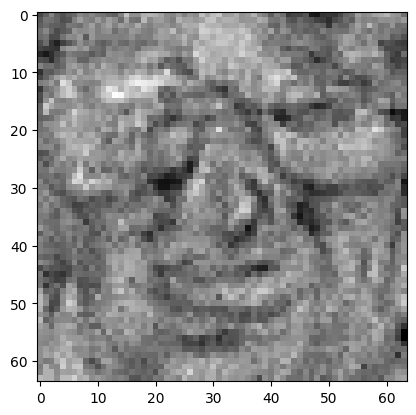

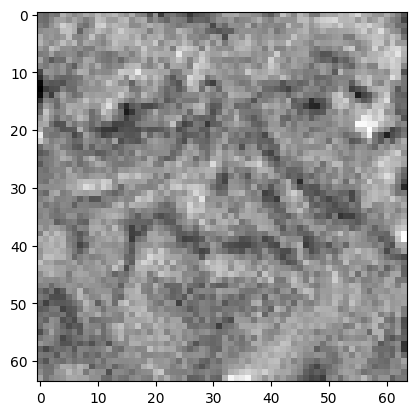

Epoch 462 : 


100%|██████████| 100/100 [00:07<00:00, 13.35it/s]


loss 0.2451555745201954
Epoch 463 : 


100%|██████████| 100/100 [00:07<00:00, 13.12it/s]


loss 0.19607918138449193
Epoch 464 : 


100%|██████████| 100/100 [00:07<00:00, 13.37it/s]


loss 0.1821614645671965
Epoch 465 : 


100%|██████████| 100/100 [00:07<00:00, 13.30it/s]


loss 0.2112559945615397
Epoch 466 : 


100%|██████████| 100/100 [00:07<00:00, 13.58it/s]


loss 0.21323217083035553
Epoch 467 : 


100%|██████████| 100/100 [00:07<00:00, 13.01it/s]


loss 0.22205254282572467
Epoch 468 : 


100%|██████████| 100/100 [00:07<00:00, 13.32it/s]


loss 0.18825691150571855
Epoch 469 : 


100%|██████████| 100/100 [00:07<00:00, 13.20it/s]


loss 0.21255122107368543
Epoch 470 : 


100%|██████████| 100/100 [00:07<00:00, 13.55it/s]


loss 0.21799097148611965
Epoch 471 : 


100%|██████████| 100/100 [00:07<00:00, 13.26it/s]


loss 0.23583689179254827
Epoch 472 : 


100%|██████████| 100/100 [00:07<00:00, 12.89it/s]


loss 0.21960828272688104
Epoch 473 : 


100%|██████████| 100/100 [00:07<00:00, 13.06it/s]


loss 0.21040519682334932
Epoch 474 : 


100%|██████████| 100/100 [00:07<00:00, 13.19it/s]


loss 0.2268212570211532
Epoch 475 : 


100%|██████████| 100/100 [00:07<00:00, 13.03it/s]


loss 0.20503673955662743
Epoch 476 : 


100%|██████████| 100/100 [00:07<00:00, 13.36it/s]


loss 0.21018293317051193
Epoch 477 : 


100%|██████████| 100/100 [00:07<00:00, 13.50it/s]


loss 0.2621884292870136
Epoch 478 : 


100%|██████████| 100/100 [00:07<00:00, 13.22it/s]


loss 0.19028274388456412
Epoch 479 : 


100%|██████████| 100/100 [00:07<00:00, 13.44it/s]


loss 0.21064537152781795
Epoch 480 : 


100%|██████████| 100/100 [00:07<00:00, 13.08it/s]


loss 0.2662179608975046
Epoch 481 : 


100%|██████████| 100/100 [00:07<00:00, 13.48it/s]


loss 0.2292512755491738
torch.Size([3, 1, 64, 64])


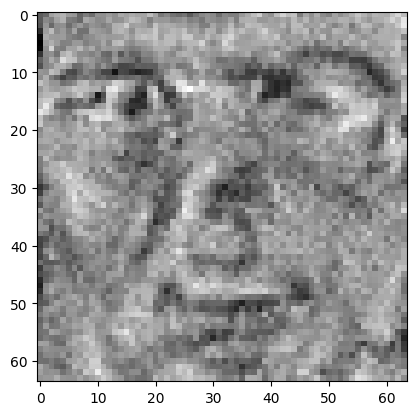

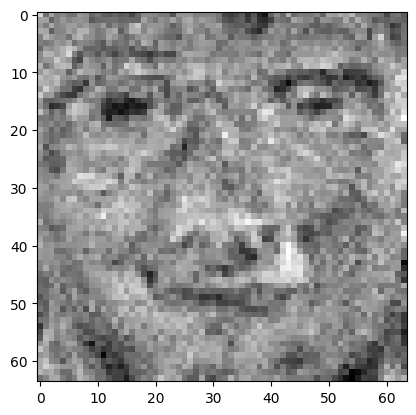

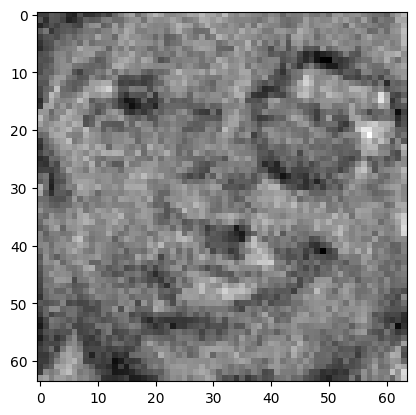

Epoch 482 : 


100%|██████████| 100/100 [00:07<00:00, 13.35it/s]


loss 0.23114931044440734
Epoch 483 : 


100%|██████████| 100/100 [00:07<00:00, 13.61it/s]


loss 0.1843016537175061
Epoch 484 : 


100%|██████████| 100/100 [00:07<00:00, 13.36it/s]


loss 0.1951915345924556
Epoch 485 : 


100%|██████████| 100/100 [00:07<00:00, 13.41it/s]


loss 0.20636262891895152
Epoch 486 : 


100%|██████████| 100/100 [00:07<00:00, 13.46it/s]


loss 0.19983252387152045
Epoch 487 : 


100%|██████████| 100/100 [00:07<00:00, 13.20it/s]


loss 0.20154573646647475
Epoch 488 : 


100%|██████████| 100/100 [00:07<00:00, 13.46it/s]


loss 0.2001148073097204
Epoch 489 : 


100%|██████████| 100/100 [00:07<00:00, 13.15it/s]


loss 0.220469885500587
Epoch 490 : 


100%|██████████| 100/100 [00:07<00:00, 13.82it/s]


loss 0.2072831127908016
Epoch 491 : 


100%|██████████| 100/100 [00:07<00:00, 13.10it/s]


loss 0.20687473826423433
Epoch 492 : 


100%|██████████| 100/100 [00:07<00:00, 13.28it/s]


loss 0.19473218861743163
Epoch 493 : 


100%|██████████| 100/100 [00:07<00:00, 13.69it/s]


loss 0.21212236429561707
Epoch 494 : 


100%|██████████| 100/100 [00:07<00:00, 13.91it/s]


loss 0.17654466615155806
Epoch 495 : 


100%|██████████| 100/100 [00:07<00:00, 13.32it/s]


loss 0.27336655013206523
Epoch 496 : 


100%|██████████| 100/100 [00:07<00:00, 13.59it/s]


loss 0.21341592705219223
Epoch 497 : 


100%|██████████| 100/100 [00:07<00:00, 13.15it/s]


loss 0.21856360954458584
Epoch 498 : 


100%|██████████| 100/100 [00:07<00:00, 13.13it/s]


loss 0.21681529344864867
Epoch 499 : 


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]


loss 0.2087814896533041


In [7]:
train_ddpm(500, 0.0001, 1, 0.0000)